# Pre-processing of HR data and Data Augmentation

> **Team BrAiny**: Maria Lancho Lavilla, Lara Vehovec and Marta Galván Prieto

Since the data provided was difficult to analyze and incomplete, we excuted several steps in order to obtain two different datasets that were used in order to train the model using Microsoft Azure. The steps are the following, being in the end the Data Augmentation.

*Note*: We only used the Heart Rate (HR) data out of the provided Phase 1 Dataset.

In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as ss
import statistics as stats
import seaborn as sns 
from pandas.plotting import autocorrelation_plot


import os
import glob
import random

We first wanted to take a look at the data, so we choose one single example and plotted the **HR** and the steps for it. Since,as we learnt from reading the two different papers provided, all of the different Smart Watches measure step and sleep data in different way, we decided to only take **HR** to train our model. **HR** date is usually measured in a common way in all devices. 

This way we were also able to see the type of data present on every column of the dataset and how to be able to work with it.

## One case example and analysis

In [14]:
dataf_example_hr = pd.read_csv('Covid-19-Wearables/AV2GF3B_hr.csv')

In [15]:
display(dataf_example_hr)
dataf_example_hr.info() #see type of element

,user,datetime,heartrate
0,AV2GF3B,2025-12-28 00:00:00,66
1,AV2GF3B,2025-12-28 00:01:00,66
2,AV2GF3B,2025-12-28 00:02:00,68
3,AV2GF3B,2025-12-28 00:03:00,71
4,AV2GF3B,2025-12-28 00:04:00,71
...,...,...,...
77557,AV2GF3B,2026-03-27 20:16:00,81
77558,AV2GF3B,2026-03-27 20:17:00,81
77559,AV2GF3B,2026-03-27 20:18:00,81
77560,AV2GF3B,2026-03-27 20:19:00,81


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77562 entries, 0 to 77561
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       77562 non-null  object
 1   datetime   77562 non-null  object
 2   heartrate  77562 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [4]:
dataf_example_hr.datetime[0][0:10] #to check how to obtain only the date without time

'2025-12-28'

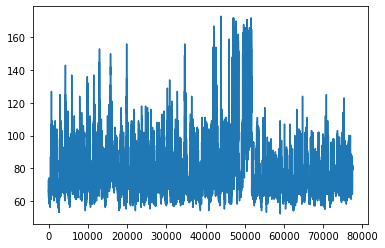

In [5]:
plt.plot(dataf_example_hr.heartrate) #plot of hr

In [6]:
dataf_example_step = pd.read_csv('Covid-19-Wearables/AV2GF3B_steps.csv')

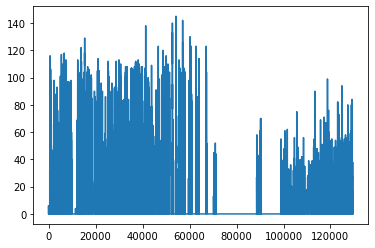

In [7]:
dataf_example_step.steps
plt.plot(dataf_example_step.steps)

In [8]:
#Loop done in order to try to see if we could calculate the number of steps and use it for smth
count = 0
element_where_zero_step = []
for el in dataf_example_step.steps:
    if dataf_example_step.steps[el]< 8:
        count = count + 1
    else:
        count = count


In [9]:
count

129540

Once we checked how the data looked like and tried a few approaches, we had clear we only wanted to use the HR for tackling the rest of the problems. Since the data present in one of the columns was temporal (dates and time), it was a challenging task to do. The steps taken in order to obtain clean data that was later used for augmentation are the following:

**First**,the labels are downloaded. Then, we saw that the time stamp for the symptom onset was given, and whether the patient became sick as well. With that, we generated a new .csv, only containing patient number ID of only the patients that were covid positive and the dates were the symptoms started. Since there were cases were there were multiple onset symptoms, some of them had more columns with data. For others this data was empty. This .csv can be seen in the following cell. 



In [11]:
covid_unclean = pd.read_csv('positive_patients.csv')
display(covid_unclean)

,ParticipantID,Date1,Date2,Date3,Date4
0,AFPB8J2,2026-07-14,NaN,NaN,NaN
1,APGIB2T,2023-05-22,NaN,NaN,NaN
2,AQC0L71,2028-06-17,NaN,NaN,NaN
3,A0NVTRV,2023-12-06,NaN,NaN,NaN
4,AOYM4KG,2023-08-29,2022-11-14,2023-07-04,2023-10-24
5,AR4FPCC,2027-04-11,2027-02-16,NaN,NaN
6,A4G0044,2027-03-04,NaN,NaN,NaN
7,AUILKHG,2027-07-18,NaN,NaN,NaN
8,AD77K91,2023-09-04,NaN,NaN,NaN
9,A3OU183,2024-11-23,NaN,NaN,NaN


It is easily seen that we have a problem because not all of the 43 patients out of the 120 total ones had multiple onset dates. For supressing this, we decided to write the patient repeated, and set the date next to it. For computational efficiency, since in the final excel they all come back together. This was only done in order to get an easier approach. The new .csv can be seen in the following cell. 

In [12]:
covid = pd.read_csv('covid_prueba_labels.csv')
display(covid)

covid.ParticipantID[0] #see how it works

,ParticipantID,Date
0,AFPB8J2,2026-07-14
1,APGIB2T,2023-05-22
2,AQC0L71,2028-06-17
3,A0NVTRV,2023-12-06
4,AOYM4KG,2023-08-29
...,...,...
57,A4E0D03,2027-12-25
58,A1K5DRI,2028-06-20
59,A7EM0B6,2023-12-21
60,AZIK4ZA,2024-11-24


'AFPB8J2'

Having the data from both cleared, we joined them, in order to be able to see in one entire csv for each patient when the symtoms started. For that, we used several loops to iterate through the covid positive dataframe and all of the timestamps of the one that we had. When the patient ID was present in the covid positive dataframe, we would look at the date where the symptoms started, and set it as a 1 in a new created column. This column was called 'Symtom_onset'. If not, it would remain zero. Then, to save it in a way we could compare it with the test provided, we changed two headers and dropped the user column. Finally, we obtained 120 documents, one for each patient, that were used to train the model.

In [21]:
import pandas as pd
import os
import glob
  
  
# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join('Covid-19-Wearables', "*_hr.csv"))
#print(csv_files)

covid = pd.read_csv('covid_prueba_labels.csv')
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
    df['Symptom_onset'] = 0
    
      
    # print the location and filename
    #print('Location:', f)
    #print('File Name:', f.split("\\")[-1])
      
    # print the content
    #print('Content:')
    #display(df)
    #print()
    for i in range(np.shape(covid)[0]):
        if covid.ParticipantID[i] == df.user[0]:
            onset_date = covid.Date[i]
            for j in range(np.shape(df)[0]):
                if df.datetime[j][0:10] == onset_date:
                    df.Symptom_onset[j] = 1
                    
   
    
    df.heartrate = df.heartrate.astype(float)  
    df = df.rename({'datetime':'timestamp','heartrate':'heart_rate'},axis = 1)
    
    filename = 'New-Dataset_final/'+ df.user[0]+'.csv'
    df = df.drop(['user'],axis=1)
    df.to_csv(filename,index=False)
    
    display(df)

,timestamp,heart_rate,Symptom_onset
0,2024-09-16 00:00:07,80.0,0
1,2024-09-16 00:00:17,81.0,0
2,2024-09-16 00:00:32,81.0,0
3,2024-09-16 00:00:42,82.0,0
4,2024-09-16 00:00:52,80.0,0
...,...,...,...
383363,2024-10-26 23:58:06,83.0,0
383364,2024-10-26 23:58:21,82.0,0
383365,2024-10-26 23:58:36,82.0,0
383366,2024-10-26 23:58:46,84.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-12-31 00:00:00,64.0,0
1,2024-12-31 00:01:00,63.0,0
2,2024-12-31 00:02:00,65.0,0
3,2024-12-31 00:03:00,65.0,0
4,2024-12-31 00:04:00,63.0,0
...,...,...,...
119328,2025-03-31 18:59:00,153.0,0
119329,2025-03-31 19:00:00,151.0,0
119330,2025-03-31 19:01:00,154.0,0
119331,2025-03-31 19:02:00,147.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2025-12-28 00:00:00,66.0,0
1,2025-12-28 00:01:00,66.0,0
2,2025-12-28 00:02:00,68.0,0
3,2025-12-28 00:03:00,71.0,0
4,2025-12-28 00:04:00,71.0,0
...,...,...,...
77557,2026-03-27 20:16:00,81.0,0
77558,2026-03-27 20:17:00,81.0,0
77559,2026-03-27 20:18:00,81.0,0
77560,2026-03-27 20:19:00,81.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-03-26 00:00:50,56.0,0
1,2024-03-26 00:00:55,57.0,0
2,2024-03-26 00:01:00,53.0,0
3,2024-03-26 00:01:05,50.0,0
4,2024-03-26 00:01:20,51.0,0
...,...,...,...
987713,2024-07-02 23:58:31,57.0,0
987714,2024-07-02 23:58:41,58.0,0
987715,2024-07-02 23:58:46,62.0,0
987716,2024-07-02 23:58:51,68.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-11-30 00:00:00,65.0,0
1,2024-11-30 00:00:15,67.0,0
2,2024-11-30 00:00:20,65.0,0
3,2024-11-30 00:00:25,65.0,0
4,2024-11-30 00:00:35,64.0,0
...,...,...,...
989625,2025-03-04 23:49:03,77.0,0
989626,2025-03-04 23:49:18,77.0,0
989627,2025-03-04 23:49:23,75.0,0
989628,2025-03-04 23:49:38,75.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-06-20 00:00:03,59.0,0
1,2024-06-20 00:00:18,59.0,0
2,2024-06-20 00:00:23,58.0,0
3,2024-06-20 00:00:28,57.0,0
4,2024-06-20 00:00:33,56.0,0
...,...,...,...
463202,2024-08-06 23:58:18,56.0,0
463203,2024-08-06 23:58:33,56.0,0
463204,2024-08-06 23:58:48,56.0,0
463205,2024-08-06 23:58:53,57.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-05-13 00:00:02,73.0,0
1,2025-05-13 00:00:07,72.0,0
2,2025-05-13 00:00:17,73.0,0
3,2025-05-13 00:00:22,72.0,0
4,2025-05-13 00:00:27,72.0,0
...,...,...,...
333981,2025-06-16 23:58:12,68.0,0
333982,2025-06-16 23:58:17,69.0,0
333983,2025-06-16 23:58:32,67.0,0
333984,2025-06-16 23:58:47,67.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2027-03-31 00:00:01,78.0,0
1,2027-03-31 00:00:06,79.0,0
2,2027-03-31 00:00:11,83.0,0
3,2027-03-31 00:00:16,86.0,0
4,2027-03-31 00:00:21,87.0,0
...,...,...,...
868329,2027-06-25 23:58:18,67.0,0
868330,2027-06-25 23:58:33,67.0,0
868331,2027-06-25 23:58:43,65.0,0
868332,2027-06-25 23:58:48,63.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2025-01-20 00:00:00,80.0,0
1,2025-01-20 00:01:00,80.0,0
2,2025-01-20 00:02:00,80.0,0
3,2025-01-20 00:03:00,82.0,0
4,2025-01-20 00:04:00,80.0,0
...,...,...,...
127418,2025-04-20 17:58:00,85.0,0
127419,2025-04-20 17:59:00,87.0,0
127420,2025-04-20 18:00:00,85.0,0
127421,2025-04-20 18:01:00,87.0,0


,timestamp,heart_rate,Symptom_onset
0,2027-03-01 00:00:12,56.0,0
1,2027-03-01 00:00:27,57.0,0
2,2027-03-01 00:00:32,56.0,0
3,2027-03-01 00:00:47,56.0,0
4,2027-03-01 00:01:02,56.0,0
...,...,...,...
875046,2027-05-29 23:58:30,61.0,0
875047,2027-05-29 23:58:40,63.0,0
875048,2027-05-29 23:58:45,58.0,0
875049,2027-05-29 23:58:50,56.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-05-09 00:00:06,78.0,0
1,2025-05-09 00:00:21,78.0,0
2,2025-05-09 00:00:36,78.0,0
3,2025-05-09 00:00:41,76.0,0
4,2025-05-09 00:00:56,76.0,0
...,...,...,...
988081,2025-08-07 23:58:33,67.0,0
988082,2025-08-07 23:58:43,66.0,0
988083,2025-08-07 23:58:48,67.0,0
988084,2025-08-07 23:58:53,68.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2027-02-20 19:24:53,70.0,0
1,2027-02-20 19:25:08,70.0,0
2,2027-02-20 19:25:23,70.0,0
3,2027-02-20 19:25:28,73.0,0
4,2027-02-20 19:25:49,70.0,0
...,...,...,...
890692,2027-05-29 23:57:55,74.0,0
890693,2027-05-29 23:58:00,75.0,0
890694,2027-05-29 23:58:15,75.0,0
890695,2027-05-29 23:58:30,74.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2028-04-22 09:24:55,70.0,0
1,2028-04-22 09:25:05,71.0,0
2,2028-04-22 09:25:10,70.0,0
3,2028-04-22 09:25:15,71.0,0
4,2028-04-22 09:25:25,77.0,0
...,...,...,...
887553,2028-07-18 22:05:09,75.0,0
887554,2028-07-18 22:05:19,74.0,0
887555,2028-07-18 22:05:24,73.0,0
887556,2028-07-18 22:05:29,73.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-08-10 16:23:00,70.0,0
1,2024-08-10 16:24:00,83.0,0
2,2024-08-10 16:25:00,78.0,0
3,2024-08-10 16:26:00,80.0,0
4,2024-08-10 16:27:00,84.0,0
...,...,...,...
11070,2024-11-06 23:12:00,69.0,0
11071,2024-11-06 23:13:00,74.0,0
11072,2024-11-06 23:14:00,77.0,0
11073,2024-11-06 23:15:00,82.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-07-09 00:00:03,58.0,0
1,2025-07-09 00:00:18,59.0,0
2,2025-07-09 00:00:23,57.0,0
3,2025-07-09 00:00:38,58.0,0
4,2025-07-09 00:00:53,58.0,0
...,...,...,...
523711,2025-09-01 23:57:50,65.0,0
523712,2025-09-01 23:58:05,65.0,0
523713,2025-09-01 23:58:20,65.0,0
523714,2025-09-01 23:58:35,65.0,0


,timestamp,heart_rate,Symptom_onset
0,2028-02-22 00:00:03,72.0,0
1,2028-02-22 00:00:18,71.0,0
2,2028-02-22 00:00:23,70.0,0
3,2028-02-22 00:00:28,69.0,0
4,2028-02-22 00:00:33,70.0,0
...,...,...,...
884442,2028-06-02 23:58:27,67.0,0
884443,2028-06-02 23:58:32,66.0,0
884444,2028-06-02 23:58:37,63.0,0
884445,2028-06-02 23:58:42,62.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-06-25 00:00:04,63.0,0
1,2024-06-25 00:00:19,64.0,0
2,2024-06-25 00:00:34,64.0,0
3,2024-06-25 00:00:49,64.0,0
4,2024-06-25 00:00:59,63.0,0
...,...,...,...
990357,2024-09-29 23:58:01,67.0,0
990358,2024-09-29 23:58:11,68.0,0
990359,2024-09-29 23:58:16,70.0,0
990360,2024-09-29 23:58:31,70.0,0


,timestamp,heart_rate,Symptom_onset
0,2023-01-19 00:00:00,70.0,0
1,2023-01-19 00:01:00,70.0,0
2,2023-01-19 00:02:00,70.0,0
3,2023-01-19 00:03:00,71.0,0
4,2023-01-19 00:04:00,71.0,0
...,...,...,...
100150,2023-04-01 23:55:00,75.0,0
100151,2023-04-01 23:56:00,82.0,0
100152,2023-04-01 23:57:00,91.0,0
100153,2023-04-01 23:58:00,82.0,0


,timestamp,heart_rate,Symptom_onset
0,2023-12-26 00:00:01,67.0,0
1,2023-12-26 00:00:16,67.0,0
2,2023-12-26 00:00:31,67.0,0
3,2023-12-26 00:00:46,67.0,0
4,2023-12-26 00:01:01,67.0,0
...,...,...,...
928964,2024-03-26 23:58:07,64.0,0
928965,2024-03-26 23:58:17,66.0,0
928966,2024-03-26 23:58:32,66.0,0
928967,2024-03-26 23:58:37,67.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-01-26 20:32:29,70.0,0
1,2025-01-26 20:40:29,70.0,0
2,2025-01-26 20:40:34,70.0,0
3,2025-01-26 20:40:39,75.0,0
4,2025-01-26 20:40:44,77.0,0
...,...,...,...
618290,2025-04-01 23:58:24,82.0,0
618291,2025-04-01 23:58:39,84.0,0
618292,2025-04-01 23:58:44,85.0,0
618293,2025-04-01 23:58:54,95.0,0


,timestamp,heart_rate,Symptom_onset
0,2023-05-19 00:00:04,55.0,0
1,2023-05-19 00:00:19,55.0,0
2,2023-05-19 00:00:24,56.0,0
3,2023-05-19 00:00:39,56.0,0
4,2023-05-19 00:00:54,56.0,0
...,...,...,...
974134,2023-08-16 23:58:12,72.0,0
974135,2023-08-16 23:58:22,72.0,0
974136,2023-08-16 23:58:27,72.0,0
974137,2023-08-16 23:58:42,72.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-02-25 00:00:00,75.0,0
1,2025-02-25 00:01:00,75.0,0
2,2025-02-25 00:02:00,75.0,0
3,2025-02-25 00:03:00,74.0,0
4,2025-02-25 00:04:00,76.0,0
...,...,...,...
124401,2025-05-03 23:58:41,75.0,0
124402,2025-05-03 23:58:43,76.0,0
124403,2025-05-03 23:58:48,74.0,0
124404,2025-05-03 23:58:53,73.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-09-17 00:00:02,63.0,0
1,2025-09-17 00:00:07,64.0,0
2,2025-09-17 00:00:12,61.0,0
3,2025-09-17 00:00:17,59.0,0
4,2025-09-17 00:00:22,61.0,0
...,...,...,...
495751,2025-12-21 23:58:05,51.0,0
495752,2025-12-21 23:58:10,49.0,0
495753,2025-12-21 23:58:20,50.0,0
495754,2025-12-21 23:58:35,50.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-03-21 00:00:03,60.0,0
1,2024-03-21 00:00:08,60.0,0
2,2024-03-21 00:00:23,60.0,0
3,2024-03-21 00:00:28,61.0,0
4,2024-03-21 00:00:33,60.0,0
...,...,...,...
866648,2024-05-29 23:57:05,61.0,0
866649,2024-05-29 23:57:10,60.0,0
866650,2024-05-29 23:57:15,61.0,0
866651,2024-05-29 23:57:20,62.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-10-07 00:00:00,74.0,0
1,2024-10-07 00:01:00,72.0,0
2,2024-10-07 00:02:00,74.0,0
3,2024-10-07 00:03:00,75.0,0
4,2024-10-07 00:04:00,69.0,0
...,...,...,...
75109,2025-01-04 18:01:00,82.0,0
75110,2025-01-04 18:02:00,81.0,0
75111,2025-01-04 18:03:00,80.0,0
75112,2025-01-04 18:04:00,79.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-09-11 00:00:00,50.0,0
1,2024-09-11 00:00:15,50.0,0
2,2024-09-11 00:00:30,50.0,0
3,2024-09-11 00:00:35,49.0,0
4,2024-09-11 00:00:50,50.0,0
...,...,...,...
626490,2024-11-20 23:58:28,50.0,0
626491,2024-11-20 23:58:33,49.0,0
626492,2024-11-20 23:58:48,49.0,0
626493,2024-11-20 23:58:53,49.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2023-09-09 00:00:04,75.0,0
1,2023-09-09 00:00:09,75.0,0
2,2023-09-09 00:00:14,73.0,0
3,2023-09-09 00:00:24,71.0,0
4,2023-09-09 00:00:29,71.0,0
...,...,...,...
1245466,2024-01-15 23:58:04,82.0,0
1245467,2024-01-15 23:58:14,81.0,0
1245468,2024-01-15 23:58:29,80.0,0
1245469,2024-01-15 23:58:44,80.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-02-22 00:00:05,71.0,0
1,2025-02-22 00:00:10,72.0,0
2,2025-02-22 00:00:20,70.0,0
3,2025-02-22 00:00:25,68.0,0
4,2025-02-22 00:00:35,70.0,0
...,...,...,...
568495,2025-04-18 23:58:13,71.0,0
568496,2025-04-18 23:58:18,71.0,0
568497,2025-04-18 23:58:33,72.0,0
568498,2025-04-18 23:58:43,71.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-01-03 00:00:02,68.0,0
1,2024-01-03 00:00:07,67.0,0
2,2024-01-03 00:00:22,67.0,0
3,2024-01-03 00:00:37,67.0,0
4,2024-01-03 00:00:42,68.0,0
...,...,...,...
786100,2024-03-27 23:58:38,66.0,0
786101,2024-03-27 23:58:43,62.0,0
786102,2024-03-27 23:58:48,61.0,0
786103,2024-03-27 23:58:53,60.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2024-06-23 00:00:00,76.0,0
1,2024-06-23 00:00:10,75.0,0
2,2024-06-23 00:00:25,75.0,0
3,2024-06-23 00:00:40,75.0,0
4,2024-06-23 00:00:55,75.0,0
...,...,...,...
698818,2024-09-05 23:58:17,63.0,0
698819,2024-09-05 23:58:22,62.0,0
698820,2024-09-05 23:58:37,62.0,0
698821,2024-09-05 23:58:42,61.0,0


,timestamp,heart_rate,Symptom_onset
0,2027-06-30 00:00:02,71.0,0
1,2027-06-30 00:00:17,70.0,0
2,2027-06-30 00:00:22,69.0,0
3,2027-06-30 00:00:37,71.0,0
4,2027-06-30 00:00:42,73.0,0
...,...,...,...
480124,2027-08-10 23:58:26,64.0,0
480125,2027-08-10 23:58:31,65.0,0
480126,2027-08-10 23:58:46,65.0,0
480127,2027-08-10 23:58:51,66.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2023-01-27 00:00:07,67.0,0
1,2023-01-27 00:00:12,66.0,0
2,2023-01-27 00:00:27,67.0,0
3,2023-01-27 00:00:37,68.0,0
4,2023-01-27 00:00:52,67.0,0
...,...,...,...
866816,2023-04-27 21:32:34,117.0,0
866817,2023-04-27 21:32:44,117.0,0
866818,2023-04-27 21:32:49,117.0,0
866819,2023-04-27 21:32:54,118.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2024-12-04 00:00:03,61.0,0
1,2024-12-04 00:00:08,60.0,0
2,2024-12-04 00:00:23,60.0,0
3,2024-12-04 00:00:33,61.0,0
4,2024-12-04 00:00:43,62.0,0
...,...,...,...
688832,2025-02-16 23:58:23,62.0,0
688833,2025-02-16 23:58:28,61.0,0
688834,2025-02-16 23:58:38,60.0,0
688835,2025-02-16 23:58:53,60.0,0


,timestamp,heart_rate,Symptom_onset
0,2027-01-08 00:00:03,60.0,0
1,2027-01-08 00:00:05,60.0,0
2,2027-01-08 00:00:15,61.0,0
3,2027-01-08 00:00:20,60.0,0
4,2027-01-08 00:00:25,61.0,0
...,...,...,...
679121,2027-03-14 23:58:06,53.0,0
679122,2027-03-14 23:58:21,53.0,0
679123,2027-03-14 23:58:26,52.0,0
679124,2027-03-14 23:58:33,52.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-02-12 00:00:13,69.0,0
1,2025-02-12 00:00:28,69.0,0
2,2025-02-12 00:00:33,69.0,0
3,2025-02-12 00:00:38,68.0,0
4,2025-02-12 00:00:53,65.0,0
...,...,...,...
1460190,2025-03-29 23:58:51,66.0,0
1460191,2025-03-29 23:58:52,65.0,0
1460192,2025-03-29 23:58:55,65.0,0
1460193,2025-03-29 23:58:58,65.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2023-08-15 00:00:00,72.0,0
1,2023-08-15 00:00:05,73.0,0
2,2023-08-15 00:00:20,73.0,0
3,2023-08-15 00:00:35,73.0,0
4,2023-08-15 00:00:50,74.0,0
...,...,...,...
874257,2023-11-12 23:58:29,78.0,0
874258,2023-11-12 23:58:34,79.0,0
874259,2023-11-12 23:58:44,78.0,0
874260,2023-11-12 23:58:54,78.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2023-06-28 00:00:00,60.0,0
1,2023-06-28 00:01:00,60.0,0
2,2023-06-28 00:02:00,61.0,0
3,2023-06-28 00:03:00,59.0,0
4,2023-06-28 00:04:00,57.0,0
...,...,...,...
146622,2023-09-21 23:58:34,60.0,0
146623,2023-09-21 23:58:39,62.0,0
146624,2023-09-21 23:58:44,61.0,0
146625,2023-09-21 23:58:49,60.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2023-07-12 00:00:00,75.0,0
1,2023-07-12 00:01:00,74.0,0
2,2023-07-12 00:02:00,73.0,0
3,2023-07-12 00:03:00,68.0,0
4,2023-07-12 00:04:00,69.0,0
...,...,...,...
88863,2023-10-11 19:49:00,95.0,0
88864,2023-10-11 19:50:00,96.0,0
88865,2023-10-11 19:51:00,97.0,0
88866,2023-10-11 19:52:00,96.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2023-02-18 00:00:08,62.0,0
1,2023-02-18 00:00:18,61.0,0
2,2023-02-18 00:00:33,61.0,0
3,2023-02-18 00:00:38,62.0,0
4,2023-02-18 00:00:53,63.0,0
...,...,...,...
624666,2023-04-18 23:58:32,68.0,0
624667,2023-04-18 23:58:37,72.0,0
624668,2023-04-18 23:58:42,69.0,0
624669,2023-04-18 23:58:47,68.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2028-06-20 00:00:06,69.0,0
1,2028-06-20 00:00:11,70.0,0
2,2028-06-20 00:00:16,69.0,0
3,2028-06-20 00:00:21,68.0,0
4,2028-06-20 00:00:31,69.0,0
...,...,...,...
938896,2028-09-18 23:57:56,85.0,0
938897,2028-09-18 23:58:01,85.0,0
938898,2028-09-18 23:58:16,85.0,0
938899,2028-09-18 23:58:31,85.0,0


,timestamp,heart_rate,Symptom_onset
0,2028-01-28 14:57:31,105.0,0
1,2028-01-28 14:57:46,105.0,0
2,2028-01-28 14:57:51,107.0,0
3,2028-01-28 14:58:01,108.0,0
4,2028-01-28 14:58:11,107.0,0
...,...,...,...
274029,2028-04-18 09:58:13,72.0,0
274030,2028-04-18 09:58:18,74.0,0
274031,2028-04-18 09:58:23,75.0,0
274032,2028-04-18 09:58:28,72.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-04-26 00:00:04,62.0,0
1,2024-04-26 00:00:19,61.0,0
2,2024-04-26 00:00:24,58.0,0
3,2024-04-26 00:00:29,56.0,0
4,2024-04-26 00:00:44,55.0,0
...,...,...,...
893311,2024-07-24 23:58:03,47.0,0
893312,2024-07-24 23:58:13,45.0,0
893313,2024-07-24 23:58:23,46.0,0
893314,2024-07-24 23:58:38,46.0,0


,timestamp,heart_rate,Symptom_onset
0,2027-06-28 00:00:00,76.0,0
1,2027-06-28 00:01:00,76.0,0
2,2027-06-28 00:02:00,76.0,0
3,2027-06-28 00:03:00,75.0,0
4,2027-06-28 00:04:00,75.0,0
...,...,...,...
122575,2027-09-26 17:13:00,79.0,0
122576,2027-09-26 17:14:00,78.0,0
122577,2027-09-26 17:15:00,81.0,0
122578,2027-09-26 17:16:00,81.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2029-07-11 00:00:00,70.0,0
1,2029-07-11 00:00:10,71.0,0
2,2029-07-11 00:00:25,71.0,0
3,2029-07-11 00:00:30,70.0,0
4,2029-07-11 00:00:45,70.0,0
...,...,...,...
398684,2029-10-09 23:58:24,56.0,0
398685,2029-10-09 23:58:29,55.0,0
398686,2029-10-09 23:58:34,56.0,0
398687,2029-10-09 23:58:49,57.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-07-19 00:00:00,74.0,0
1,2026-07-19 00:01:00,72.0,0
2,2026-07-19 00:02:00,73.0,0
3,2026-07-19 00:03:00,73.0,0
4,2026-07-19 00:04:00,73.0,0
...,...,...,...
126797,2026-10-17 09:30:00,76.0,0
126798,2026-10-17 09:31:00,77.0,0
126799,2026-10-17 09:32:00,73.0,0
126800,2026-10-17 09:33:00,73.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2024-08-08 22:13:04,97.0,0
1,2024-08-08 22:13:09,70.0,0
2,2024-08-08 22:13:19,96.0,0
3,2024-08-08 22:13:24,98.0,0
4,2024-08-08 22:13:34,95.0,0
...,...,...,...
897474,2024-11-11 23:58:39,98.0,0
897475,2024-11-11 23:58:44,99.0,0
897476,2024-11-11 23:58:49,100.0,0
897477,2024-11-11 23:58:54,102.0,0


,timestamp,heart_rate,Symptom_onset
0,2027-05-13 04:16:35,70.0,0
1,2027-05-13 04:16:50,86.0,0
2,2027-05-13 04:16:55,90.0,0
3,2027-05-13 04:17:00,101.0,0
4,2027-05-13 04:17:05,110.0,0
...,...,...,...
508634,2027-08-09 18:53:09,75.0,0
508635,2027-08-09 18:53:24,74.0,0
508636,2027-08-09 18:53:39,75.0,0
508637,2027-08-09 18:53:44,77.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2024-11-05 00:00:01,94.0,0
1,2024-11-05 00:00:16,94.0,0
2,2024-11-05 00:00:31,94.0,0
3,2024-11-05 00:00:46,93.0,0
4,2024-11-05 00:00:56,91.0,0
...,...,...,...
738936,2025-01-15 23:56:31,61.0,0
738937,2025-01-15 23:56:36,59.0,0
738938,2025-01-15 23:56:41,58.0,0
738939,2025-01-15 23:56:56,58.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-10-29 00:00:09,75.0,0
1,2025-10-29 00:00:24,75.0,0
2,2025-10-29 00:00:34,76.0,0
3,2025-10-29 00:00:39,77.0,0
4,2025-10-29 00:00:54,77.0,0
...,...,...,...
742173,2026-01-05 23:58:34,95.0,0
742174,2026-01-05 23:58:39,90.0,0
742175,2026-01-05 23:58:49,95.0,0
742176,2026-01-05 23:58:54,96.0,0


,timestamp,heart_rate,Symptom_onset
0,2029-09-02 00:00:03,67.0,0
1,2029-09-02 00:00:08,65.0,0
2,2029-09-02 00:00:14,64.0,0
3,2029-09-02 00:00:19,63.0,0
4,2029-09-02 00:00:24,62.0,0
...,...,...,...
949159,2029-12-01 23:58:32,69.0,0
949160,2029-12-01 23:58:37,69.0,0
949161,2029-12-01 23:58:43,70.0,0
949162,2029-12-01 23:58:48,71.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-07-12 00:00:07,65.0,0
1,2026-07-12 00:00:12,66.0,0
2,2026-07-12 00:00:17,65.0,0
3,2026-07-12 00:00:22,64.0,0
4,2026-07-12 00:00:37,65.0,0
...,...,...,...
446810,2026-10-09 23:58:08,81.0,0
446811,2026-10-09 23:58:23,80.0,0
446812,2026-10-09 23:58:28,79.0,0
446813,2026-10-09 23:58:43,79.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2023-11-22 00:00:12,60.0,0
1,2023-11-22 00:00:17,59.0,0
2,2023-11-22 00:00:32,59.0,0
3,2023-11-22 00:00:37,58.0,0
4,2023-11-22 00:00:47,59.0,0
...,...,...,...
642168,2024-01-27 23:58:29,66.0,0
642169,2024-01-27 23:58:34,66.0,0
642170,2024-01-27 23:58:39,66.0,0
642171,2024-01-27 23:58:44,65.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-03-23 00:00:01,63.0,0
1,2024-03-23 00:00:11,62.0,0
2,2024-03-23 00:00:16,60.0,0
3,2024-03-23 00:00:21,58.0,0
4,2024-03-23 00:00:26,56.0,0
...,...,...,...
919192,2024-06-20 23:58:32,54.0,0
919193,2024-06-20 23:58:37,55.0,0
919194,2024-06-20 23:58:42,56.0,0
919195,2024-06-20 23:58:52,55.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2025-08-11 00:00:04,86.0,0
1,2025-08-11 00:00:19,86.0,0
2,2025-08-11 00:00:24,86.0,0
3,2025-08-11 00:00:34,86.0,0
4,2025-08-11 00:00:49,86.0,0
...,...,...,...
662641,2025-10-24 23:57:50,61.0,0
662642,2025-10-24 23:58:05,61.0,0
662643,2025-10-24 23:58:20,61.0,0
662644,2025-10-24 23:58:30,60.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2025-02-11 00:00:02,62.0,0
1,2025-02-11 00:00:07,64.0,0
2,2025-02-11 00:00:12,65.0,0
3,2025-02-11 00:00:17,64.0,0
4,2025-02-11 00:00:22,63.0,0
...,...,...,...
1436532,2025-05-14 23:58:48,56.0,0
1436533,2025-05-14 23:58:51,56.0,0
1436534,2025-05-14 23:58:52,57.0,0
1436535,2025-05-14 23:58:54,58.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-06-17 00:00:00,46.0,0
1,2024-06-17 00:00:10,46.0,0
2,2024-06-17 00:00:15,44.0,0
3,2024-06-17 00:00:20,46.0,0
4,2024-06-17 00:00:25,49.0,0
...,...,...,...
798348,2024-09-01 23:58:34,40.0,0
798349,2024-09-01 23:58:44,39.0,0
798350,2024-09-01 23:58:49,41.0,0
798351,2024-09-01 23:58:54,45.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-09-22 00:00:11,72.0,0
1,2024-09-22 00:00:16,73.0,0
2,2024-09-22 00:00:31,73.0,0
3,2024-09-22 00:00:41,72.0,0
4,2024-09-22 00:00:46,70.0,0
...,...,...,...
595844,2024-11-16 23:58:25,82.0,0
595845,2024-11-16 23:58:30,81.0,0
595846,2024-11-16 23:58:35,82.0,0
595847,2024-11-16 23:58:45,81.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-02-12 03:54:27,70.0,0
1,2024-02-12 03:55:08,70.0,0
2,2024-02-12 07:10:04,70.0,0
3,2024-02-12 07:10:14,70.0,0
4,2024-02-12 07:10:19,70.0,0
...,...,...,...
252180,2024-04-29 22:03:27,98.0,0
252181,2024-04-29 22:03:32,97.0,0
252182,2024-04-29 22:03:37,96.0,0
252183,2024-04-29 22:03:52,96.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-01-21 00:00:07,77.0,0
1,2026-01-21 00:00:22,77.0,0
2,2026-01-21 00:00:27,77.0,0
3,2026-01-21 00:00:32,78.0,0
4,2026-01-21 00:00:37,78.0,0
...,...,...,...
828146,2026-04-22 00:13:53,102.0,0
828147,2026-04-22 00:14:03,101.0,0
828148,2026-04-22 00:14:13,98.0,0
828149,2026-04-22 00:14:23,99.0,0


,timestamp,heart_rate,Symptom_onset
0,2023-09-08 23:24:00,70.0,0
1,2023-09-08 23:24:15,70.0,0
2,2023-09-08 23:24:30,70.0,0
3,2023-09-08 23:24:35,69.0,0
4,2023-09-08 23:24:40,68.0,0
...,...,...,...
471194,2023-10-27 23:58:10,46.0,0
471195,2023-10-27 23:58:25,46.0,0
471196,2023-10-27 23:58:30,47.0,0
471197,2023-10-27 23:58:40,48.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2023-04-13 00:00:00,77.0,0
1,2023-04-13 00:01:00,79.0,0
2,2023-04-13 00:02:00,78.0,0
3,2023-04-13 00:03:00,80.0,0
4,2023-04-13 00:04:00,81.0,0
...,...,...,...
152486,2023-07-17 17:49:05,79.0,0
152487,2023-07-17 17:49:20,79.0,0
152488,2023-07-17 17:49:35,81.0,0
152489,2023-07-17 17:49:40,84.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-03-26 09:27:00,92.0,0
1,2026-03-26 09:28:00,93.0,0
2,2026-03-26 09:29:00,86.0,0
3,2026-03-26 09:30:00,85.0,0
4,2026-03-26 09:31:00,97.0,0
...,...,...,...
106622,2026-06-25 00:02:00,81.0,0
106623,2026-06-25 00:03:00,81.0,0
106624,2026-06-25 00:04:00,84.0,0
106625,2026-06-25 00:05:00,88.0,0


,timestamp,heart_rate,Symptom_onset
0,2023-06-24 07:21:33,70.0,0
1,2023-06-24 07:21:48,70.0,0
2,2023-06-24 07:22:03,70.0,0
3,2023-06-24 07:22:18,70.0,0
4,2023-06-24 07:22:33,70.0,0
...,...,...,...
770460,2023-09-12 23:58:33,61.0,0
770461,2023-09-12 23:58:38,60.0,0
770462,2023-09-12 23:58:43,61.0,0
770463,2023-09-12 23:58:48,62.0,0


,timestamp,heart_rate,Symptom_onset
0,2027-02-27 17:27:31,94.0,0
1,2027-02-27 17:27:46,94.0,0
2,2027-02-27 17:28:01,93.0,0
3,2027-02-27 17:28:11,95.0,0
4,2027-02-27 17:28:16,97.0,0
...,...,...,...
263800,2027-04-17 16:01:01,85.0,0
263801,2027-04-17 16:01:08,85.0,0
263802,2027-04-17 16:01:18,87.0,0
263803,2027-04-17 16:01:33,86.0,0


,timestamp,heart_rate,Symptom_onset
0,2023-11-01 16:47:01,70.0,0
1,2023-11-01 16:47:16,70.0,0
2,2023-11-01 16:47:31,70.0,0
3,2023-11-01 16:47:46,70.0,0
4,2023-11-01 16:47:51,73.0,0
...,...,...,...
867355,2024-01-26 23:58:28,93.0,0
867356,2024-01-26 23:58:33,82.0,0
867357,2024-01-26 23:58:38,81.0,0
867358,2024-01-26 23:58:43,79.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2027-06-09 00:00:00,58.0,0
1,2027-06-09 00:01:00,59.0,0
2,2027-06-09 00:02:00,56.0,0
3,2027-06-09 00:03:00,57.0,0
4,2027-06-09 00:04:00,57.0,0
...,...,...,...
185869,2027-09-14 09:19:34,67.0,0
185870,2027-09-14 09:19:44,66.0,0
185871,2027-09-14 09:19:49,64.0,0
185872,2027-09-14 09:19:54,63.0,0


,timestamp,heart_rate,Symptom_onset
0,2023-01-09 00:00:00,72.0,0
1,2023-01-09 00:01:00,73.0,0
2,2023-01-09 00:02:00,76.0,0
3,2023-01-09 00:03:00,74.0,0
4,2023-01-09 00:04:00,74.0,0
...,...,...,...
195584,2023-04-17 06:40:45,82.0,0
195585,2023-04-17 11:57:03,88.0,0
195586,2023-04-17 11:57:08,80.0,0
195587,2023-04-17 11:57:13,70.0,0


,timestamp,heart_rate,Symptom_onset
0,2023-08-22 00:00:00,72.0,0
1,2023-08-22 00:01:00,76.0,0
2,2023-08-22 00:02:00,70.0,0
3,2023-08-22 00:03:00,69.0,0
4,2023-08-22 00:04:00,77.0,0
...,...,...,...
100564,2023-11-22 16:39:00,83.0,0
100565,2023-11-22 16:40:00,80.0,0
100566,2023-11-22 16:41:00,77.0,0
100567,2023-11-22 16:42:00,76.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-05-07 23:00:00,79.0,0
1,2025-05-07 23:01:00,67.0,0
2,2025-05-07 23:02:00,63.0,0
3,2025-05-07 23:03:00,63.0,0
4,2025-05-07 23:04:00,63.0,0
...,...,...,...
33828,2025-08-04 06:25:00,58.0,0
33829,2025-08-04 06:26:00,64.0,0
33830,2025-08-04 06:27:00,62.0,0
33831,2025-08-04 06:28:00,62.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-10-09 00:00:06,78.0,0
1,2025-10-09 00:00:11,79.0,0
2,2025-10-09 00:00:21,79.0,0
3,2025-10-09 00:00:31,75.0,0
4,2025-10-09 00:00:36,75.0,0
...,...,...,...
909417,2026-01-07 23:58:18,62.0,0
909418,2026-01-07 23:58:23,63.0,0
909419,2026-01-07 23:58:33,64.0,0
909420,2026-01-07 23:58:48,64.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-12-25 00:00:00,72.0,0
1,2026-12-25 00:01:00,76.0,0
2,2026-12-25 00:02:00,76.0,0
3,2026-12-25 00:03:00,77.0,0
4,2026-12-25 00:04:00,78.0,0
...,...,...,...
74714,2027-03-24 00:54:00,64.0,0
74715,2027-03-24 00:58:00,77.0,0
74716,2027-03-24 00:59:00,82.0,0
74717,2027-03-24 01:00:00,85.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2026-12-30 00:00:00,73.0,0
1,2026-12-30 00:01:00,72.0,0
2,2026-12-30 00:02:00,70.0,0
3,2026-12-30 00:03:00,68.0,0
4,2026-12-30 00:04:00,78.0,0
...,...,...,...
124185,2027-03-30 11:23:00,84.0,0
124186,2027-03-30 11:24:00,100.0,0
124187,2027-03-30 11:25:00,89.0,0
124188,2027-03-30 11:26:00,84.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2027-12-01 00:00:02,70.0,0
1,2027-12-01 00:00:07,69.0,0
2,2027-12-01 00:00:22,69.0,0
3,2027-12-01 00:00:27,71.0,0
4,2027-12-01 00:00:32,72.0,0
...,...,...,...
827955,2028-02-28 23:58:10,66.0,0
827956,2028-02-28 23:58:20,66.0,0
827957,2028-02-28 23:58:28,66.0,0
827958,2028-02-28 23:58:43,66.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-07-22 00:00:04,78.0,0
1,2026-07-22 00:00:09,77.0,0
2,2026-07-22 00:00:14,76.0,0
3,2026-07-22 00:00:19,75.0,0
4,2026-07-22 00:00:24,74.0,0
...,...,...,...
879556,2026-10-22 23:58:31,59.0,0
879557,2026-10-22 23:58:36,60.0,0
879558,2026-10-22 23:58:41,64.0,0
879559,2026-10-22 23:58:46,65.0,0


,timestamp,heart_rate,Symptom_onset
0,2022-11-10 05:29:58,70.0,0
1,2022-11-10 05:30:03,70.0,0
2,2022-11-10 06:00:00,70.0,0
3,2022-11-10 06:00:10,104.0,0
4,2022-11-10 06:00:15,117.0,0
...,...,...,...
326271,2023-02-09 23:58:25,78.0,0
326272,2023-02-09 23:58:30,70.0,0
326273,2023-02-09 23:58:35,66.0,0
326274,2023-02-09 23:58:40,64.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-02-21 04:37:20,72.0,0
1,2024-02-21 04:37:30,70.0,0
2,2024-02-21 04:37:45,70.0,0
3,2024-02-21 04:38:00,70.0,0
4,2024-02-21 04:38:05,70.0,0
...,...,...,...
997138,2024-05-21 05:07:49,71.0,0
997139,2024-05-21 05:07:59,68.0,0
997140,2024-05-21 05:08:04,64.0,0
997141,2024-05-21 05:08:09,61.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-06-13 00:00:14,85.0,0
1,2024-06-13 00:00:19,86.0,0
2,2024-06-13 00:00:34,86.0,0
3,2024-06-13 00:00:39,87.0,0
4,2024-06-13 00:00:44,89.0,0
...,...,...,...
744093,2024-08-20 23:58:08,89.0,0
744094,2024-08-20 23:58:23,89.0,0
744095,2024-08-20 23:58:33,90.0,0
744096,2024-08-20 23:58:43,89.0,0


,timestamp,heart_rate,Symptom_onset
0,2027-03-18 00:00:00,54.0,0
1,2027-03-18 00:00:15,53.0,0
2,2027-03-18 00:00:30,54.0,0
3,2027-03-18 00:00:45,54.0,0
4,2027-03-18 00:00:55,55.0,0
...,...,...,...
1086769,2027-07-09 23:58:11,55.0,0
1086770,2027-07-09 23:58:26,56.0,0
1086771,2027-07-09 23:58:31,55.0,0
1086772,2027-07-09 23:58:46,53.0,0


,timestamp,heart_rate,Symptom_onset
0,2028-03-23 21:36:13,70.0,0
1,2028-03-23 22:55:36,70.0,0
2,2028-03-23 22:56:07,70.0,0
3,2028-03-24 05:45:02,70.0,0
4,2028-03-24 05:45:12,91.0,0
...,...,...,...
257037,2028-06-11 19:43:14,72.0,0
257038,2028-06-11 19:43:19,72.0,0
257039,2028-06-11 19:43:34,72.0,0
257040,2028-06-11 19:43:39,73.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2027-07-28 00:00:01,72.0,0
1,2027-07-28 00:00:06,74.0,0
2,2027-07-28 00:00:16,74.0,0
3,2027-07-28 00:00:21,75.0,0
4,2027-07-28 00:00:26,76.0,0
...,...,...,...
798807,2027-10-22 23:58:15,78.0,0
798808,2027-10-22 23:58:30,78.0,0
798809,2027-10-22 23:58:35,79.0,0
798810,2027-10-22 23:58:40,80.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-11-30 06:49:04,101.0,0
1,2024-11-30 06:49:09,107.0,0
2,2024-11-30 06:49:24,107.0,0
3,2024-11-30 06:49:29,100.0,0
4,2024-11-30 06:49:34,98.0,0
...,...,...,...
316116,2025-02-14 23:05:49,155.0,0
316117,2025-02-14 23:06:04,155.0,0
316118,2025-02-14 23:06:09,156.0,0
316119,2025-02-14 23:06:14,154.0,0


,timestamp,heart_rate,Symptom_onset
0,2028-01-07 00:00:07,75.0,0
1,2028-01-07 00:00:17,74.0,0
2,2028-01-07 00:00:32,75.0,0
3,2028-01-07 00:00:37,76.0,0
4,2028-01-07 00:00:42,77.0,0
...,...,...,...
903129,2028-03-21 23:58:23,69.0,0
903130,2028-03-21 23:58:28,71.0,0
903131,2028-03-21 23:58:33,69.0,0
903132,2028-03-21 23:58:38,67.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-03-13 00:00:04,51.0,0
1,2024-03-13 00:00:14,51.0,0
2,2024-03-13 00:00:24,53.0,0
3,2024-03-13 00:00:34,54.0,0
4,2024-03-13 00:00:39,51.0,0
...,...,...,...
695075,2024-05-17 23:58:24,53.0,0
695076,2024-05-17 23:58:29,52.0,0
695077,2024-05-17 23:58:34,53.0,0
695078,2024-05-17 23:58:49,53.0,0


,timestamp,heart_rate,Symptom_onset
0,2023-09-24 10:20:00,70.0,0
1,2023-09-24 10:20:10,81.0,0
2,2023-09-24 10:20:15,87.0,0
3,2023-09-24 10:20:20,89.0,0
4,2023-09-24 10:20:25,90.0,0
...,...,...,...
679931,2023-12-22 17:40:58,106.0,0
679932,2023-12-22 17:41:03,104.0,0
679933,2023-12-22 17:41:08,101.0,0
679934,2023-12-22 17:41:13,102.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-09-30 00:00:09,76.0,0
1,2025-09-30 00:00:19,75.0,0
2,2025-09-30 00:00:29,76.0,0
3,2025-09-30 00:00:34,77.0,0
4,2025-09-30 00:00:39,76.0,0
...,...,...,...
593807,2025-12-02 23:58:33,66.0,0
593808,2025-12-02 23:58:38,67.0,0
593809,2025-12-02 23:58:48,68.0,0
593810,2025-12-02 23:58:53,69.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-08-20 00:00:01,60.0,0
1,2026-08-20 00:00:10,60.0,0
2,2026-08-20 00:00:25,60.0,0
3,2026-08-20 00:00:30,59.0,0
4,2026-08-20 00:00:35,60.0,0
...,...,...,...
740801,2026-11-05 23:58:08,49.0,0
740802,2026-11-05 23:58:13,50.0,0
740803,2026-11-05 23:58:23,49.0,0
740804,2026-11-05 23:58:38,49.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-07-10 00:00:00,58.0,0
1,2026-07-10 00:01:00,57.0,0
2,2026-07-10 00:02:00,57.0,0
3,2026-07-10 00:03:00,57.0,0
4,2026-07-10 00:04:00,58.0,0
...,...,...,...
103332,2026-09-24 23:55:00,56.0,0
103333,2026-09-24 23:56:00,51.0,0
103334,2026-09-24 23:57:00,51.0,0
103335,2026-09-24 23:58:00,51.0,0


,timestamp,heart_rate,Symptom_onset
0,2027-02-17 00:00:14,82.0,0
1,2027-02-17 00:00:29,82.0,0
2,2027-02-17 00:00:39,81.0,0
3,2027-02-17 00:00:44,82.0,0
4,2027-02-17 00:00:49,83.0,0
...,...,...,...
983885,2027-05-20 23:58:32,84.0,0
983886,2027-05-20 23:58:37,85.0,0
983887,2027-05-20 23:58:47,86.0,0
983888,2027-05-20 23:58:52,89.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-02-12 00:00:00,79.0,0
1,2024-02-12 00:00:10,80.0,0
2,2024-02-12 00:00:15,79.0,0
3,2024-02-12 00:00:30,79.0,0
4,2024-02-12 00:00:37,77.0,0
...,...,...,...
803329,2024-05-13 17:49:07,90.0,0
803330,2024-05-13 17:49:17,91.0,0
803331,2024-05-13 17:49:32,91.0,0
803332,2024-05-13 17:49:44,92.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-03-07 08:46:12,72.0,0
1,2026-03-07 08:46:15,72.0,0
2,2026-03-07 08:46:18,72.0,0
3,2026-03-07 08:46:21,72.0,0
4,2026-03-07 08:46:24,72.0,0
...,...,...,...
941908,2026-04-27 23:58:19,72.0,0
941909,2026-04-27 23:58:24,71.0,0
941910,2026-04-27 23:58:29,72.0,0
941911,2026-04-27 23:58:34,73.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-10-15 00:00:04,70.0,0
1,2024-10-15 00:00:09,71.0,0
2,2024-10-15 00:00:14,73.0,0
3,2024-10-15 00:00:19,75.0,0
4,2024-10-15 00:00:24,79.0,0
...,...,...,...
852961,2025-01-07 23:58:07,66.0,0
852962,2025-01-07 23:58:22,67.0,0
852963,2025-01-07 23:58:32,66.0,0
852964,2025-01-07 23:58:47,67.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2023-03-21 06:46:30,64.0,0
1,2023-03-21 06:46:41,64.0,0
2,2023-03-21 06:46:56,67.0,0
3,2023-03-21 06:47:01,83.0,0
4,2023-03-21 06:47:16,80.0,0
...,...,...,...
416067,2023-05-09 23:58:18,74.0,0
416068,2023-05-09 23:58:23,73.0,0
416069,2023-05-09 23:58:28,72.0,0
416070,2023-05-09 23:58:33,70.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2024-02-04 00:00:14,64.0,0
1,2024-02-04 00:00:24,63.0,0
2,2024-02-04 00:00:34,64.0,0
3,2024-02-04 00:00:39,63.0,0
4,2024-02-04 00:00:44,61.0,0
...,...,...,...
679294,2024-04-08 23:58:37,57.0,0
679295,2024-04-08 23:58:42,56.0,0
679296,2024-04-08 23:58:47,58.0,0
679297,2024-04-08 23:58:52,59.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2026-12-31 00:00:10,69.0,0
1,2026-12-31 00:00:47,68.0,0
2,2026-12-31 00:00:57,68.0,0
3,2026-12-31 00:01:12,69.0,0
4,2026-12-31 00:01:17,69.0,0
...,...,...,...
372453,2027-02-16 23:58:35,101.0,0
372454,2027-02-16 23:58:40,97.0,0
372455,2027-02-16 23:58:45,95.0,0
372456,2027-02-16 23:58:50,94.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2025-05-12 21:09:52,70.0,0
1,2025-05-12 21:53:15,70.0,0
2,2025-05-12 21:53:32,70.0,0
3,2025-05-12 21:54:13,70.0,0
4,2025-05-12 21:54:23,75.0,0
...,...,...,...
1144881,2025-11-16 06:01:50,87.0,0
1144882,2025-11-16 06:02:05,87.0,0
1144883,2025-11-16 06:02:20,87.0,0
1144884,2025-11-16 06:02:25,87.0,0


,timestamp,heart_rate,Symptom_onset
0,2027-11-22 00:00:04,60.0,0
1,2027-11-22 00:00:09,61.0,0
2,2027-11-22 00:00:24,62.0,0
3,2027-11-22 00:00:29,63.0,0
4,2027-11-22 00:00:34,64.0,0
...,...,...,...
977020,2028-02-20 23:58:10,69.0,0
977021,2028-02-20 23:58:20,70.0,0
977022,2028-02-20 23:58:30,69.0,0
977023,2028-02-20 23:58:45,70.0,0


,timestamp,heart_rate,Symptom_onset
0,2024-08-19 00:00:00,92.0,0
1,2024-08-19 00:01:00,93.0,0
2,2024-08-19 00:02:00,94.0,0
3,2024-08-19 00:03:00,87.0,0
4,2024-08-19 00:04:00,88.0,0
...,...,...,...
251267,2024-11-27 23:58:21,83.0,0
251268,2024-11-27 23:58:26,84.0,0
251269,2024-11-27 23:58:31,85.0,0
251270,2024-11-27 23:58:41,86.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2028-05-09 18:15:32,70.0,0
1,2028-05-09 18:15:47,71.0,0
2,2028-05-09 18:15:52,73.0,0
3,2028-05-09 18:15:57,76.0,0
4,2028-05-09 18:16:02,77.0,0
...,...,...,...
516124,2028-06-29 23:38:15,72.0,0
516125,2028-06-29 23:38:20,73.0,0
516126,2028-06-29 23:38:25,74.0,0
516127,2028-06-29 23:38:40,73.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2030-06-22 00:00:09,64.0,0
1,2030-06-22 00:00:19,63.0,0
2,2030-06-22 00:00:24,62.0,0
3,2030-06-22 00:00:29,60.0,0
4,2030-06-22 00:00:44,60.0,0
...,...,...,...
324086,2030-09-03 23:58:02,57.0,0
324087,2030-09-03 23:58:17,57.0,0
324088,2030-09-03 23:58:32,57.0,0
324089,2030-09-03 23:58:42,58.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2028-04-12 00:00:01,95.0,0
1,2028-04-12 00:00:06,93.0,0
2,2028-04-12 00:00:11,92.0,0
3,2028-04-12 00:00:16,88.0,0
4,2028-04-12 00:00:31,86.0,0
...,...,...,...
736661,2028-06-20 23:58:24,81.0,0
736662,2028-06-20 23:58:29,80.0,0
736663,2028-06-20 23:58:44,77.0,0
736664,2028-06-20 23:58:49,76.0,0


,timestamp,heart_rate,Symptom_onset
0,2028-02-08 00:00:08,102.0,0
1,2028-02-08 00:00:13,99.0,0
2,2028-02-08 00:00:23,100.0,0
3,2028-02-08 00:00:28,101.0,0
4,2028-02-08 00:00:33,102.0,0
...,...,...,...
1208700,2028-05-16 23:58:23,79.0,0
1208701,2028-05-16 23:58:33,79.0,0
1208702,2028-05-16 23:58:38,81.0,0
1208703,2028-05-16 23:58:43,80.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2023-10-26 00:00:06,83.0,0
1,2023-10-26 00:00:11,83.0,0
2,2023-10-26 00:00:16,82.0,0
3,2023-10-26 00:00:21,80.0,0
4,2023-10-26 00:00:26,79.0,0
...,...,...,...
372100,2024-01-06 23:58:28,89.0,0
372101,2024-01-06 23:58:33,88.0,0
372102,2024-01-06 23:58:43,89.0,0
372103,2024-01-06 23:58:53,88.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2026-06-22 00:00:00,88.0,0
1,2026-06-22 00:00:05,89.0,0
2,2026-06-22 00:00:10,88.0,0
3,2026-06-22 00:00:15,87.0,0
4,2026-06-22 00:00:20,84.0,0
...,...,...,...
761086,2026-08-31 23:57:55,80.0,0
761087,2026-08-31 23:58:05,79.0,0
761088,2026-08-31 23:58:20,79.0,0
761089,2026-08-31 23:58:35,77.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2024-08-02 09:12:49,70.0,0
1,2024-08-02 09:12:54,70.0,0
2,2024-08-02 09:12:59,70.0,0
3,2024-08-02 09:13:04,70.0,0
4,2024-08-02 09:13:09,70.0,0
...,...,...,...
315853,2024-11-22 22:07:06,70.0,0
315854,2024-11-22 22:19:06,70.0,0
315855,2024-11-22 22:21:11,70.0,0
315856,2024-11-22 22:21:21,92.0,0


,timestamp,heart_rate,Symptom_onset
0,2022-11-28 00:00:01,77.0,0
1,2022-11-28 00:00:16,77.0,0
2,2022-11-28 00:00:31,77.0,0
3,2022-11-28 00:00:36,77.0,0
4,2022-11-28 00:00:41,81.0,0
...,...,...,...
870818,2023-02-26 23:58:31,73.0,0
870819,2023-02-26 23:58:36,72.0,0
870820,2023-02-26 23:58:46,71.0,0
870821,2023-02-26 23:58:51,72.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2024-02-10 00:00:04,50.0,0
1,2024-02-10 00:00:19,50.0,0
2,2024-02-10 00:00:34,50.0,0
3,2024-02-10 00:00:39,50.0,0
4,2024-02-10 00:00:44,50.0,0
...,...,...,...
459582,2024-05-10 23:58:38,56.0,0
459583,2024-05-10 23:58:43,58.0,0
459584,2024-05-10 23:58:48,57.0,0
459585,2024-05-10 23:58:53,56.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-11-13 20:03:00,78.0,0
1,2025-11-13 20:04:00,76.0,0
2,2025-11-13 20:05:00,76.0,0
3,2025-11-13 20:06:00,74.0,0
4,2025-11-13 20:07:00,72.0,0
...,...,...,...
128424,2026-01-12 23:58:16,60.0,0
128425,2026-01-12 23:58:21,59.0,0
128426,2026-01-12 23:58:26,58.0,0
128427,2026-01-12 23:58:41,58.0,0


,timestamp,heart_rate,Symptom_onset
0,2023-06-05 00:00:03,60.0,0
1,2023-06-05 00:00:13,59.0,0
2,2023-06-05 00:00:28,59.0,0
3,2023-06-05 00:00:33,60.0,0
4,2023-06-05 00:00:38,62.0,0
...,...,...,...
427629,2023-07-23 23:58:04,52.0,0
427630,2023-07-23 23:58:19,52.0,0
427631,2023-07-23 23:58:34,53.0,0
427632,2023-07-23 23:58:44,53.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-11-09 00:00:00,60.0,0
1,2026-11-09 00:01:00,61.0,0
2,2026-11-09 00:02:00,61.0,0
3,2026-11-09 00:03:00,60.0,0
4,2026-11-09 00:04:00,60.0,0
...,...,...,...
108972,2027-02-07 20:02:00,63.0,0
108973,2027-02-07 20:03:00,63.0,0
108974,2027-02-07 20:04:00,65.0,0
108975,2027-02-07 20:05:00,62.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2024-07-07 00:00:06,68.0,0
1,2024-07-07 00:00:16,67.0,0
2,2024-07-07 00:00:21,66.0,0
3,2024-07-07 00:00:26,67.0,0
4,2024-07-07 00:00:31,66.0,0
...,...,...,...
1426022,2024-11-12 22:51:24,71.0,0
1426023,2024-11-12 22:51:29,70.0,0
1426024,2024-11-12 22:51:34,69.0,0
1426025,2024-11-12 22:51:44,65.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2024-10-24 00:00:02,71.0,0
1,2024-10-24 00:00:07,72.0,0
2,2024-10-24 00:00:17,71.0,0
3,2024-10-24 00:00:22,70.0,0
4,2024-10-24 00:00:37,70.0,0
...,...,...,...
805791,2025-01-10 23:58:15,89.0,0
805792,2025-01-10 23:58:30,90.0,0
805793,2025-01-10 23:58:45,90.0,0
805794,2025-01-10 23:58:50,91.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2026-07-13 10:47:07,57.0,0
1,2026-07-13 10:47:12,57.0,0
2,2026-07-13 10:47:17,57.0,0
3,2026-07-13 10:47:32,57.0,0
4,2026-07-13 10:47:37,57.0,0
...,...,...,...
641839,2026-09-23 23:58:18,71.0,0
641840,2026-09-23 23:58:23,72.0,0
641841,2026-09-23 23:58:38,73.0,0
641842,2026-09-23 23:58:53,73.0,0


,timestamp,heart_rate,Symptom_onset
0,2025-07-31 00:00:03,60.0,0
1,2025-07-31 00:00:08,60.0,0
2,2025-07-31 00:00:23,60.0,0
3,2025-07-31 00:00:38,60.0,0
4,2025-07-31 00:00:48,64.0,0
...,...,...,...
520953,2025-10-29 18:00:58,92.0,0
520954,2025-10-29 18:01:03,92.0,0
520955,2025-10-29 18:01:08,92.0,0
520956,2025-10-29 18:01:13,90.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-05-20 00:00:06,61.0,0
1,2026-05-20 00:00:11,62.0,0
2,2026-05-20 00:00:16,63.0,0
3,2026-05-20 00:00:26,62.0,0
4,2026-05-20 00:00:36,61.0,0
...,...,...,...
602367,2026-07-14 23:58:06,83.0,0
602368,2026-07-14 23:58:16,82.0,0
602369,2026-07-14 23:58:31,82.0,0
602370,2026-07-14 23:58:36,81.0,0


,timestamp,heart_rate,Symptom_onset
0,2027-09-06 00:00:05,74.0,0
1,2027-09-06 00:00:20,74.0,0
2,2027-09-06 00:00:25,75.0,0
3,2027-09-06 00:00:40,74.0,0
4,2027-09-06 00:00:55,74.0,0
...,...,...,...
531024,2027-12-04 23:30:35,68.0,0
531025,2027-12-04 23:30:50,68.0,0
531026,2027-12-04 23:31:05,68.0,0
531027,2027-12-04 23:31:15,75.0,0


,timestamp,heart_rate,Symptom_onset
0,2028-03-09 00:00:12,74.0,0
1,2028-03-09 00:00:22,75.0,0
2,2028-03-09 00:00:37,76.0,0
3,2028-03-09 00:00:42,75.0,0
4,2028-03-09 00:00:47,76.0,0
...,...,...,...
735764,2028-05-14 23:58:31,73.0,0
735765,2028-05-14 23:58:36,74.0,0
735766,2028-05-14 23:58:41,75.0,0
735767,2028-05-14 23:58:51,74.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2029-06-05 09:03:56,70.0,0
1,2029-06-05 11:48:25,70.0,0
2,2029-06-05 12:06:08,70.0,0
3,2029-06-05 12:06:23,70.0,0
4,2029-06-05 12:06:28,62.0,0
...,...,...,...
400985,2029-09-03 21:29:48,87.0,0
400986,2029-09-03 21:29:58,88.0,0
400987,2029-09-03 21:30:03,90.0,0
400988,2029-09-03 21:30:08,91.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-06-08 00:00:03,64.0,0
1,2026-06-08 00:00:08,63.0,0
2,2026-06-08 00:00:13,62.0,0
3,2026-06-08 00:00:18,61.0,0
4,2026-06-08 00:00:23,62.0,0
...,...,...,...
731887,2026-08-15 23:58:17,66.0,0
731888,2026-08-15 23:58:32,66.0,0
731889,2026-08-15 23:58:37,67.0,0
731890,2026-08-15 23:58:42,65.0,0


,timestamp,heart_rate,Symptom_onset
0,2026-01-18 00:00:01,79.0,0
1,2026-01-18 00:00:06,78.0,0
2,2026-01-18 00:00:11,81.0,0
3,2026-01-18 00:00:16,88.0,0
4,2026-01-18 00:00:21,87.0,0
...,...,...,...
1028038,2026-04-20 23:58:20,81.0,0
1028039,2026-04-20 23:58:30,80.0,0
1028040,2026-04-20 23:58:35,79.0,0
1028041,2026-04-20 23:58:45,80.0,0


<ipython-input-21-a839b1e7bafe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Symptom_onset[j] = 1


,timestamp,heart_rate,Symptom_onset
0,2026-04-22 00:00:02,63.0,0
1,2026-04-22 00:00:07,67.0,0
2,2026-04-22 00:00:17,70.0,0
3,2026-04-22 00:00:22,71.0,0
4,2026-04-22 00:00:32,75.0,0
...,...,...,...
325271,2026-05-21 23:58:17,66.0,0
325272,2026-05-21 23:58:22,65.0,0
325273,2026-05-21 23:58:27,64.0,0
325274,2026-05-21 23:58:42,64.0,0


# Data Augmentation

Since we had already invested a lot of time into modying the dataset, for the data augmentation we took a shorter dataset. We generated data from HR that had a slight variation from the given one. We also decided to alter the position of the rows, so that the model would be able to face different kinds of data. 

- In the case of **HR variation**, we computed the standard deviation of the given HR. This was multiplied by a certain random number generated from 0 to 1 and then divided by 10. Then, the final value could be added or substracted, depending on a random generation of numbers.

- For the **row shuffling** two different approaches are used. 

In [28]:
#DATA AUGMENTATION


from sklearn.utils import shuffle
import pandas as pd
import os
import glob
import random
  
  
# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join('New-Dataset_final', '*.csv'))
print(csv_files)

covid = pd.read_csv('covid_prueba_labels.csv')
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
    df['heart_rate']=0.0
    standard_deviation = np.std(df.heartrate,axis=0) #generate new HR data
    for i in range(np.shape(df)[0]):
        num = random.uniform(0,1)/10
        bo = round(random.uniform(0,1),0)
        if bo==1:
            df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
        else:
            df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


    
    df = df.rename({'datetime':'timestamp'},axis = 1)
    df = df.drop(['Unnamed: 0'],axis=1)
    df = df.drop(['heartrate'],axis=1)
    
    
    filename = 'Augmented-Dataset/'+ df.user[0]+'_XXX.csv'
    df1 = df.drop(['user'],axis=1)
    df1.to_csv(filename,index=False)  
    
    display(df)
    
    
    
    
    #SHUFFLE OF ROWS

    df2 = shuffle(df)
    filename1 = 'Augmented-Dataset/'+ df.user[0]+'SR1_XXX.csv'
    df2.to_csv(filename1,index=False) 
    
    #SHUFFLE OF ROWS DIFFERENT OPTION
    df3 = df.sample(frac=1)
    filename2 = 'Augmented-Dataset/'+ df.user[0]+'SR2_XXX.csv'
    df3.to_csv(filename2,index=False) 
    
    
    

['New-Dataset/AQ25Y0L.csv', 'New-Dataset/AX6281V.csv', 'New-Dataset/A5XL2IC.csv', 'New-Dataset/AOQA85X.csv', 'New-Dataset/AE2B3RH.csv', 'New-Dataset/A3ADWUT.csv', 'New-Dataset/A6BUI4N.csv', 'New-Dataset/ASFODQR.csv', 'New-Dataset/A8CBEJZ.csv', 'New-Dataset/A65HVGP.csv', 'New-Dataset/AKTGD8X.csv', 'New-Dataset/A0VFT1N.csv', 'New-Dataset/AFEFA29.csv', 'New-Dataset/AD77K91.csv', 'New-Dataset/AXD3W8O.csv', 'New-Dataset/AGYQJEL.csv', 'New-Dataset/AO20DS4.csv', 'New-Dataset/A4H7SNF.csv', 'New-Dataset/AAXAA7Z.csv', 'New-Dataset/A4G0044.csv', 'New-Dataset/AY8TPMP.csv', 'New-Dataset/AHYIJDV.csv', 'New-Dataset/A36HR6Y.csv', 'New-Dataset/ALZDAVZ.csv', 'New-Dataset/AF3MXM1.csv', 'New-Dataset/AZKZ0AI.csv', 'New-Dataset/A1K5DRI.csv', 'New-Dataset/AYWIEKR.csv', 'New-Dataset/A0L9BM2.csv', 'New-Dataset/AAF9ACE.csv', 'New-Dataset/A06L7KF.csv', 'New-Dataset/AL3KT5B.csv', 'New-Dataset/AKV66US.csv', 'New-Dataset/A17YCA2.csv', 'New-Dataset/AEOBCFJ.csv', 'New-Dataset/AEZDKVO.csv', 'New-Dataset/AF3J1YC.csv', 

<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AQ25Y0L,2024-09-22 00:00:11,0,71.910574
1,AQ25Y0L,2024-09-22 00:00:16,0,71.600029
2,AQ25Y0L,2024-09-22 00:00:31,0,74.002517
3,AQ25Y0L,2024-09-22 00:00:41,0,72.981221
4,AQ25Y0L,2024-09-22 00:00:46,0,71.435969
...,...,...,...,...
595844,AQ25Y0L,2024-11-16 23:58:25,0,82.716504
595845,AQ25Y0L,2024-11-16 23:58:30,0,82.270897
595846,AQ25Y0L,2024-11-16 23:58:35,0,82.114619
595847,AQ25Y0L,2024-11-16 23:58:45,0,79.468982


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AX6281V,2024-02-04 00:00:14,0,64.573979
1,AX6281V,2024-02-04 00:00:24,0,61.646611
2,AX6281V,2024-02-04 00:00:34,0,65.277400
3,AX6281V,2024-02-04 00:00:39,0,62.843650
4,AX6281V,2024-02-04 00:00:44,0,60.701944
...,...,...,...,...
679294,AX6281V,2024-04-08 23:58:37,0,57.312562
679295,AX6281V,2024-04-08 23:58:42,0,57.332100
679296,AX6281V,2024-04-08 23:58:47,0,56.667730
679297,AX6281V,2024-04-08 23:58:52,0,58.964799


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A5XL2IC,2024-11-30 00:00:00,0,64.395031
1,A5XL2IC,2024-11-30 00:00:15,0,66.079355
2,A5XL2IC,2024-11-30 00:00:20,0,63.712624
3,A5XL2IC,2024-11-30 00:00:25,0,66.240163
4,A5XL2IC,2024-11-30 00:00:35,0,62.648846
...,...,...,...,...
989625,A5XL2IC,2025-03-04 23:49:03,0,77.388354
989626,A5XL2IC,2025-03-04 23:49:18,0,75.912426
989627,A5XL2IC,2025-03-04 23:49:23,0,75.012832
989628,A5XL2IC,2025-03-04 23:49:38,0,75.262082


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AOQA85X,2024-03-26 00:00:50,0,56.392004
1,AOQA85X,2024-03-26 00:00:55,0,56.178334
2,AOQA85X,2024-03-26 00:01:00,0,52.180055
3,AOQA85X,2024-03-26 00:01:05,0,48.997142
4,AOQA85X,2024-03-26 00:01:20,0,49.710768
...,...,...,...,...
987713,AOQA85X,2024-07-02 23:58:31,0,55.459195
987714,AOQA85X,2024-07-02 23:58:41,0,56.918135
987715,AOQA85X,2024-07-02 23:58:46,0,61.544772
987716,AOQA85X,2024-07-02 23:58:51,0,67.559453


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AE2B3RH,2027-05-13 04:16:35,0,69.981401
1,AE2B3RH,2027-05-13 04:16:50,0,86.009079
2,AE2B3RH,2027-05-13 04:16:55,0,90.672890
3,AE2B3RH,2027-05-13 04:17:00,0,102.787330
4,AE2B3RH,2027-05-13 04:17:05,0,111.644277
...,...,...,...,...
508634,AE2B3RH,2027-08-09 18:53:09,0,76.212747
508635,AE2B3RH,2027-08-09 18:53:24,0,73.523254
508636,AE2B3RH,2027-08-09 18:53:39,0,75.593326
508637,AE2B3RH,2027-08-09 18:53:44,0,76.814307


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A3ADWUT,2027-02-27 17:27:31,0,92.735095
1,A3ADWUT,2027-02-27 17:27:46,0,92.197524
2,A3ADWUT,2027-02-27 17:28:01,0,91.078708
3,A3ADWUT,2027-02-27 17:28:11,0,95.675796
4,A3ADWUT,2027-02-27 17:28:16,0,95.025390
...,...,...,...,...
263800,A3ADWUT,2027-04-17 16:01:01,0,83.730373
263801,A3ADWUT,2027-04-17 16:01:08,0,83.402345
263802,A3ADWUT,2027-04-17 16:01:18,0,86.407942
263803,A3ADWUT,2027-04-17 16:01:33,0,87.772950


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A6BUI4N,2024-09-11 00:00:00,0,50.718507
1,A6BUI4N,2024-09-11 00:00:15,0,49.121847
2,A6BUI4N,2024-09-11 00:00:30,0,51.890647
3,A6BUI4N,2024-09-11 00:00:35,0,49.651667
4,A6BUI4N,2024-09-11 00:00:50,0,50.740767
...,...,...,...,...
626490,A6BUI4N,2024-11-20 23:58:28,0,49.034775
626491,A6BUI4N,2024-11-20 23:58:33,0,49.449279
626492,A6BUI4N,2024-11-20 23:58:48,0,49.800106
626493,A6BUI4N,2024-11-20 23:58:53,0,47.657816


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,ASFODQR,2024-07-07 00:00:06,0,67.314898
1,ASFODQR,2024-07-07 00:00:16,0,67.654067
2,ASFODQR,2024-07-07 00:00:21,0,64.849855
3,ASFODQR,2024-07-07 00:00:26,0,67.733657
4,ASFODQR,2024-07-07 00:00:31,0,63.989186
...,...,...,...,...
1426022,ASFODQR,2024-11-12 22:51:24,0,69.076044
1426023,ASFODQR,2024-11-12 22:51:29,0,71.719249
1426024,ASFODQR,2024-11-12 22:51:34,0,70.621482
1426025,ASFODQR,2024-11-12 22:51:44,0,66.791325


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A8CBEJZ,2024-06-20 00:00:03,0,58.579385
1,A8CBEJZ,2024-06-20 00:00:18,0,58.932011
2,A8CBEJZ,2024-06-20 00:00:23,0,56.490577
3,A8CBEJZ,2024-06-20 00:00:28,0,57.372256
4,A8CBEJZ,2024-06-20 00:00:33,0,55.440729
...,...,...,...,...
463202,A8CBEJZ,2024-08-06 23:58:18,0,54.783505
463203,A8CBEJZ,2024-08-06 23:58:33,0,56.370966
463204,A8CBEJZ,2024-08-06 23:58:48,0,55.198513
463205,A8CBEJZ,2024-08-06 23:58:53,0,57.678979


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A65HVGP,2024-06-17 00:00:00,0,45.773454
1,A65HVGP,2024-06-17 00:00:10,0,45.276934
2,A65HVGP,2024-06-17 00:00:15,0,43.926171
3,A65HVGP,2024-06-17 00:00:20,0,46.827270
4,A65HVGP,2024-06-17 00:00:25,0,49.473974
...,...,...,...,...
798348,A65HVGP,2024-09-01 23:58:34,0,40.719192
798349,A65HVGP,2024-09-01 23:58:44,0,40.286352
798350,A65HVGP,2024-09-01 23:58:49,0,39.581724
798351,A65HVGP,2024-09-01 23:58:54,0,46.350052


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AKTGD8X,2025-11-13 20:03:00,0,77.513178
1,AKTGD8X,2025-11-13 20:04:00,0,76.043209
2,AKTGD8X,2025-11-13 20:05:00,0,76.357113
3,AKTGD8X,2025-11-13 20:06:00,0,72.648515
4,AKTGD8X,2025-11-13 20:07:00,0,72.421099
...,...,...,...,...
128424,AKTGD8X,2026-01-12 23:58:16,0,59.891294
128425,AKTGD8X,2026-01-12 23:58:21,0,60.409841
128426,AKTGD8X,2026-01-12 23:58:26,0,56.536503
128427,AKTGD8X,2026-01-12 23:58:41,0,57.853032


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A0VFT1N,2023-08-15 00:00:00,0,70.458855
1,A0VFT1N,2023-08-15 00:00:05,0,72.115652
2,A0VFT1N,2023-08-15 00:00:20,0,71.896385
3,A0VFT1N,2023-08-15 00:00:35,0,74.274921
4,A0VFT1N,2023-08-15 00:00:50,0,72.590404
...,...,...,...,...
874257,A0VFT1N,2023-11-12 23:58:29,0,78.515764
874258,A0VFT1N,2023-11-12 23:58:34,0,77.777213
874259,A0VFT1N,2023-11-12 23:58:44,0,78.147414
874260,A0VFT1N,2023-11-12 23:58:54,0,76.601031


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AFEFA29,2025-01-26 20:32:29,0,69.984878
1,AFEFA29,2025-01-26 20:40:29,0,69.225636
2,AFEFA29,2025-01-26 20:40:34,0,70.292148
3,AFEFA29,2025-01-26 20:40:39,0,75.914763
4,AFEFA29,2025-01-26 20:40:44,0,76.034604
...,...,...,...,...
618290,AFEFA29,2025-04-01 23:58:24,0,82.774147
618291,AFEFA29,2025-04-01 23:58:39,0,83.182055
618292,AFEFA29,2025-04-01 23:58:44,0,84.732433
618293,AFEFA29,2025-04-01 23:58:54,0,94.463266


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AD77K91,2023-07-12 00:00:00,0,73.808961
1,AD77K91,2023-07-12 00:01:00,0,74.038649
2,AD77K91,2023-07-12 00:02:00,0,71.657524
3,AD77K91,2023-07-12 00:03:00,0,68.378364
4,AD77K91,2023-07-12 00:04:00,0,70.273349
...,...,...,...,...
88863,AD77K91,2023-10-11 19:49:00,0,95.843834
88864,AD77K91,2023-10-11 19:50:00,0,97.016413
88865,AD77K91,2023-10-11 19:51:00,0,97.968701
88866,AD77K91,2023-10-11 19:52:00,0,95.256540


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AXD3W8O,2023-01-19 00:00:00,0,69.006165
1,AXD3W8O,2023-01-19 00:01:00,0,70.610118
2,AXD3W8O,2023-01-19 00:02:00,0,70.467241
3,AXD3W8O,2023-01-19 00:03:00,0,70.397727
4,AXD3W8O,2023-01-19 00:04:00,0,71.091379
...,...,...,...,...
100150,AXD3W8O,2023-04-01 23:55:00,0,75.234233
100151,AXD3W8O,2023-04-01 23:56:00,0,81.038904
100152,AXD3W8O,2023-04-01 23:57:00,0,90.382868
100153,AXD3W8O,2023-04-01 23:58:00,0,82.449522


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AGYQJEL,2025-05-13 00:00:02,0,72.011573
1,AGYQJEL,2025-05-13 00:00:07,0,72.288363
2,AGYQJEL,2025-05-13 00:00:17,0,72.305040
3,AGYQJEL,2025-05-13 00:00:22,0,73.286556
4,AGYQJEL,2025-05-13 00:00:27,0,73.115065
...,...,...,...,...
333981,AGYQJEL,2025-06-16 23:58:12,0,68.375922
333982,AGYQJEL,2025-06-16 23:58:17,0,69.561484
333983,AGYQJEL,2025-06-16 23:58:32,0,68.141617
333984,AGYQJEL,2025-06-16 23:58:47,0,67.091428


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AO20DS4,2024-01-03 00:00:02,0,68.495192
1,AO20DS4,2024-01-03 00:00:07,0,66.607760
2,AO20DS4,2024-01-03 00:00:22,0,66.733886
3,AO20DS4,2024-01-03 00:00:37,0,67.969503
4,AO20DS4,2024-01-03 00:00:42,0,67.008817
...,...,...,...,...
786100,AO20DS4,2024-03-27 23:58:38,0,65.932515
786101,AO20DS4,2024-03-27 23:58:43,0,63.022068
786102,AO20DS4,2024-03-27 23:58:48,0,60.166432
786103,AO20DS4,2024-03-27 23:58:53,0,60.206466


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A4H7SNF,2025-10-29 00:00:09,0,74.271514
1,A4H7SNF,2025-10-29 00:00:24,0,76.140710
2,A4H7SNF,2025-10-29 00:00:34,0,76.135605
3,A4H7SNF,2025-10-29 00:00:39,0,78.009942
4,A4H7SNF,2025-10-29 00:00:54,0,78.266391
...,...,...,...,...
742173,A4H7SNF,2026-01-05 23:58:34,0,95.761383
742174,A4H7SNF,2026-01-05 23:58:39,0,89.860981
742175,A4H7SNF,2026-01-05 23:58:49,0,94.563427
742176,A4H7SNF,2026-01-05 23:58:54,0,96.560442


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AAXAA7Z,2023-02-18 00:00:08,0,60.626640
1,AAXAA7Z,2023-02-18 00:00:18,0,60.815265
2,AAXAA7Z,2023-02-18 00:00:33,0,60.348848
3,AAXAA7Z,2023-02-18 00:00:38,0,63.638584
4,AAXAA7Z,2023-02-18 00:00:53,0,62.217899
...,...,...,...,...
624666,AAXAA7Z,2023-04-18 23:58:32,0,69.386023
624667,AAXAA7Z,2023-04-18 23:58:37,0,72.313243
624668,AAXAA7Z,2023-04-18 23:58:42,0,70.276637
624669,AAXAA7Z,2023-04-18 23:58:47,0,67.452063


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A4G0044,2026-12-30 00:00:00,0,71.822743
1,A4G0044,2026-12-30 00:01:00,0,72.825988
2,A4G0044,2026-12-30 00:02:00,0,70.712595
3,A4G0044,2026-12-30 00:03:00,0,67.786264
4,A4G0044,2026-12-30 00:04:00,0,79.237590
...,...,...,...,...
124185,A4G0044,2027-03-30 11:23:00,0,82.694998
124186,A4G0044,2027-03-30 11:24:00,0,99.213741
124187,A4G0044,2027-03-30 11:25:00,0,90.157066
124188,A4G0044,2027-03-30 11:26:00,0,83.453823


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AY8TPMP,2027-06-28 00:00:00,0,77.635768
1,AY8TPMP,2027-06-28 00:01:00,0,77.631157
2,AY8TPMP,2027-06-28 00:02:00,0,76.438613
3,AY8TPMP,2027-06-28 00:03:00,0,74.998519
4,AY8TPMP,2027-06-28 00:04:00,0,76.163644
...,...,...,...,...
122575,AY8TPMP,2027-09-26 17:13:00,0,81.290685
122576,AY8TPMP,2027-09-26 17:14:00,0,78.738171
122577,AY8TPMP,2027-09-26 17:15:00,0,79.385178
122578,AY8TPMP,2027-09-26 17:16:00,0,81.776109


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AHYIJDV,2024-12-04 00:00:03,0,59.756544
1,AHYIJDV,2024-12-04 00:00:08,0,60.353575
2,AHYIJDV,2024-12-04 00:00:23,0,58.586463
3,AHYIJDV,2024-12-04 00:00:33,0,61.811720
4,AHYIJDV,2024-12-04 00:00:43,0,61.553168
...,...,...,...,...
688832,AHYIJDV,2025-02-16 23:58:23,0,62.016415
688833,AHYIJDV,2025-02-16 23:58:28,0,60.994607
688834,AHYIJDV,2025-02-16 23:58:38,0,58.602289
688835,AHYIJDV,2025-02-16 23:58:53,0,58.953101


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A36HR6Y,2023-03-21 06:46:30,0,64.756501
1,A36HR6Y,2023-03-21 06:46:41,0,64.393792
2,A36HR6Y,2023-03-21 06:46:56,0,67.898409
3,A36HR6Y,2023-03-21 06:47:01,0,82.068837
4,A36HR6Y,2023-03-21 06:47:16,0,80.224968
...,...,...,...,...
416067,A36HR6Y,2023-05-09 23:58:18,0,73.090798
416068,A36HR6Y,2023-05-09 23:58:23,0,72.586127
416069,A36HR6Y,2023-05-09 23:58:28,0,71.178981
416070,A36HR6Y,2023-05-09 23:58:33,0,69.635643


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,ALZDAVZ,2027-11-22 00:00:04,0,60.215687
1,ALZDAVZ,2027-11-22 00:00:09,0,62.123998
2,ALZDAVZ,2027-11-22 00:00:24,0,63.406301
3,ALZDAVZ,2027-11-22 00:00:29,0,64.097875
4,ALZDAVZ,2027-11-22 00:00:34,0,64.192990
...,...,...,...,...
977020,ALZDAVZ,2028-02-20 23:58:10,0,68.627646
977021,ALZDAVZ,2028-02-20 23:58:20,0,68.916159
977022,ALZDAVZ,2028-02-20 23:58:30,0,68.738262
977023,ALZDAVZ,2028-02-20 23:58:45,0,68.902572


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AF3MXM1,2026-03-07 08:46:12,0,71.775223
1,AF3MXM1,2026-03-07 08:46:15,0,72.479067
2,AF3MXM1,2026-03-07 08:46:18,0,70.809609
3,AF3MXM1,2026-03-07 08:46:21,0,73.122749
4,AF3MXM1,2026-03-07 08:46:24,0,71.970546
...,...,...,...,...
941908,AF3MXM1,2026-04-27 23:58:19,0,72.687213
941909,AF3MXM1,2026-04-27 23:58:24,0,69.990437
941910,AF3MXM1,2026-04-27 23:58:29,0,70.725576
941911,AF3MXM1,2026-04-27 23:58:34,0,74.258140


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AZKZ0AI,2024-02-12 00:00:00,0,78.916156
1,AZKZ0AI,2024-02-12 00:00:10,0,80.703419
2,AZKZ0AI,2024-02-12 00:00:15,0,79.654283
3,AZKZ0AI,2024-02-12 00:00:30,0,79.162311
4,AZKZ0AI,2024-02-12 00:00:37,0,76.416543
...,...,...,...,...
803329,AZKZ0AI,2024-05-13 17:49:07,0,89.576378
803330,AZKZ0AI,2024-05-13 17:49:17,0,90.383056
803331,AZKZ0AI,2024-05-13 17:49:32,0,90.588219
803332,AZKZ0AI,2024-05-13 17:49:44,0,92.810608


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A1K5DRI,2028-04-22 09:24:55,0,71.117211
1,A1K5DRI,2028-04-22 09:25:05,0,72.077369
2,A1K5DRI,2028-04-22 09:25:10,0,70.923959
3,A1K5DRI,2028-04-22 09:25:15,0,69.848702
4,A1K5DRI,2028-04-22 09:25:25,0,77.262451
...,...,...,...,...
887553,A1K5DRI,2028-07-18 22:05:09,0,74.659249
887554,A1K5DRI,2028-07-18 22:05:19,0,73.841647
887555,A1K5DRI,2028-07-18 22:05:24,0,73.744375
887556,A1K5DRI,2028-07-18 22:05:29,0,71.829355


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AYWIEKR,2023-01-27 00:00:07,0,67.325754
1,AYWIEKR,2023-01-27 00:00:12,0,66.973698
2,AYWIEKR,2023-01-27 00:00:27,0,66.517310
3,AYWIEKR,2023-01-27 00:00:37,0,67.480408
4,AYWIEKR,2023-01-27 00:00:52,0,65.814455
...,...,...,...,...
866816,AYWIEKR,2023-04-27 21:32:34,0,116.920235
866817,AYWIEKR,2023-04-27 21:32:44,0,116.350920
866818,AYWIEKR,2023-04-27 21:32:49,0,116.055787
866819,AYWIEKR,2023-04-27 21:32:54,0,118.412582


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A0L9BM2,2027-06-30 00:00:02,0,72.336767
1,A0L9BM2,2027-06-30 00:00:17,0,71.390821
2,A0L9BM2,2027-06-30 00:00:22,0,69.819593
3,A0L9BM2,2027-06-30 00:00:37,0,69.905687
4,A0L9BM2,2027-06-30 00:00:42,0,72.784181
...,...,...,...,...
480124,A0L9BM2,2027-08-10 23:58:26,0,65.419023
480125,A0L9BM2,2027-08-10 23:58:31,0,66.080507
480126,A0L9BM2,2027-08-10 23:58:46,0,66.338641
480127,A0L9BM2,2027-08-10 23:58:51,0,67.387657


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AAF9ACE,2023-06-05 00:00:03,0,60.256292
1,AAF9ACE,2023-06-05 00:00:13,0,57.851644
2,AAF9ACE,2023-06-05 00:00:28,0,58.996852
3,AAF9ACE,2023-06-05 00:00:33,0,61.034156
4,AAF9ACE,2023-06-05 00:00:38,0,60.391426
...,...,...,...,...
427629,AAF9ACE,2023-07-23 23:58:04,0,50.774350
427630,AAF9ACE,2023-07-23 23:58:19,0,53.433792
427631,AAF9ACE,2023-07-23 23:58:34,0,52.257219
427632,AAF9ACE,2023-07-23 23:58:44,0,54.087355


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A06L7KF,2023-08-22 00:00:00,0,72.794569
1,A06L7KF,2023-08-22 00:01:00,0,77.094966
2,A06L7KF,2023-08-22 00:02:00,0,69.177738
3,A06L7KF,2023-08-22 00:03:00,0,69.850286
4,A06L7KF,2023-08-22 00:04:00,0,76.850657
...,...,...,...,...
100564,A06L7KF,2023-11-22 16:39:00,0,82.051630
100565,A06L7KF,2023-11-22 16:40:00,0,79.660813
100566,A06L7KF,2023-11-22 16:41:00,0,77.290014
100567,A06L7KF,2023-11-22 16:42:00,0,75.918073


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AL3KT5B,2024-06-25 00:00:04,0,64.246115
1,AL3KT5B,2024-06-25 00:00:19,0,63.452434
2,AL3KT5B,2024-06-25 00:00:34,0,65.125522
3,AL3KT5B,2024-06-25 00:00:49,0,64.534879
4,AL3KT5B,2024-06-25 00:00:59,0,62.020991
...,...,...,...,...
990357,AL3KT5B,2024-09-29 23:58:01,0,67.300275
990358,AL3KT5B,2024-09-29 23:58:11,0,67.584981
990359,AL3KT5B,2024-09-29 23:58:16,0,69.429628
990360,AL3KT5B,2024-09-29 23:58:31,0,69.069454


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AKV66US,2025-09-17 00:00:02,0,62.800293
1,AKV66US,2025-09-17 00:00:07,0,63.016970
2,AKV66US,2025-09-17 00:00:12,0,60.324037
3,AKV66US,2025-09-17 00:00:17,0,57.618043
4,AKV66US,2025-09-17 00:00:22,0,60.646084
...,...,...,...,...
495751,AKV66US,2025-12-21 23:58:05,0,51.019241
495752,AKV66US,2025-12-21 23:58:10,0,49.160282
495753,AKV66US,2025-12-21 23:58:20,0,49.335339
495754,AKV66US,2025-12-21 23:58:35,0,50.797365


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A17YCA2,2025-10-09 00:00:06,0,76.825590
1,A17YCA2,2025-10-09 00:00:11,0,80.101798
2,A17YCA2,2025-10-09 00:00:21,0,77.838501
3,A17YCA2,2025-10-09 00:00:31,0,73.494003
4,A17YCA2,2025-10-09 00:00:36,0,76.516365
...,...,...,...,...
909417,A17YCA2,2026-01-07 23:58:18,0,60.678887
909418,A17YCA2,2026-01-07 23:58:23,0,63.198872
909419,A17YCA2,2026-01-07 23:58:33,0,63.865767
909420,A17YCA2,2026-01-07 23:58:48,0,63.158986


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AEOBCFJ,2029-09-02 00:00:03,0,66.302411
1,AEOBCFJ,2029-09-02 00:00:08,0,64.183269
2,AEOBCFJ,2029-09-02 00:00:14,0,64.030153
3,AEOBCFJ,2029-09-02 00:00:19,0,62.471354
4,AEOBCFJ,2029-09-02 00:00:24,0,60.620931
...,...,...,...,...
949159,AEOBCFJ,2029-12-01 23:58:32,0,67.769046
949160,AEOBCFJ,2029-12-01 23:58:37,0,70.101270
949161,AEOBCFJ,2029-12-01 23:58:43,0,68.528564
949162,AEOBCFJ,2029-12-01 23:58:48,0,70.101139


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AEZDKVO,2028-02-22 00:00:03,0,71.836184
1,AEZDKVO,2028-02-22 00:00:18,0,70.019063
2,AEZDKVO,2028-02-22 00:00:23,0,70.348886
3,AEZDKVO,2028-02-22 00:00:28,0,68.079523
4,AEZDKVO,2028-02-22 00:00:33,0,69.024598
...,...,...,...,...
884442,AEZDKVO,2028-06-02 23:58:27,0,66.257914
884443,AEZDKVO,2028-06-02 23:58:32,0,66.065850
884444,AEZDKVO,2028-06-02 23:58:37,0,62.648087
884445,AEZDKVO,2028-06-02 23:58:42,0,61.695930


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AF3J1YC,2025-08-11 00:00:04,0,85.435297
1,AF3J1YC,2025-08-11 00:00:19,0,85.536566
2,AF3J1YC,2025-08-11 00:00:24,0,85.963048
3,AF3J1YC,2025-08-11 00:00:34,0,84.307898
4,AF3J1YC,2025-08-11 00:00:49,0,87.039432
...,...,...,...,...
662641,AF3J1YC,2025-10-24 23:57:50,0,60.821174
662642,AF3J1YC,2025-10-24 23:58:05,0,61.039524
662643,AF3J1YC,2025-10-24 23:58:20,0,59.902947
662644,AF3J1YC,2025-10-24 23:58:30,0,60.053413


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A0N9NV4,2028-03-23 21:36:13,0,69.864697
1,A0N9NV4,2028-03-23 22:55:36,0,69.001385
2,A0N9NV4,2028-03-23 22:56:07,0,69.511464
3,A0N9NV4,2028-03-24 05:45:02,0,70.484482
4,A0N9NV4,2028-03-24 05:45:12,0,91.442063
...,...,...,...,...
257037,A0N9NV4,2028-06-11 19:43:14,0,72.824267
257038,A0N9NV4,2028-06-11 19:43:19,0,71.706017
257039,A0N9NV4,2028-06-11 19:43:34,0,72.131592
257040,A0N9NV4,2028-06-11 19:43:39,0,74.067431


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AX3KEW9,2024-03-23 00:00:01,0,61.387551
1,AX3KEW9,2024-03-23 00:00:11,0,60.414365
2,AX3KEW9,2024-03-23 00:00:16,0,61.394324
3,AX3KEW9,2024-03-23 00:00:21,0,57.641181
4,AX3KEW9,2024-03-23 00:00:26,0,57.868597
...,...,...,...,...
919192,AX3KEW9,2024-06-20 23:58:32,0,53.722902
919193,AX3KEW9,2024-06-20 23:58:37,0,54.988419
919194,AX3KEW9,2024-06-20 23:58:42,0,54.806303
919195,AX3KEW9,2024-06-20 23:58:52,0,55.936015


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A11SQQN,2025-09-30 00:00:09,0,76.029966
1,A11SQQN,2025-09-30 00:00:19,0,74.947012
2,A11SQQN,2025-09-30 00:00:29,0,76.140611
3,A11SQQN,2025-09-30 00:00:34,0,77.730301
4,A11SQQN,2025-09-30 00:00:39,0,75.215693
...,...,...,...,...
593807,A11SQQN,2025-12-02 23:58:33,0,65.046944
593808,A11SQQN,2025-12-02 23:58:38,0,67.998614
593809,A11SQQN,2025-12-02 23:58:48,0,67.213285
593810,A11SQQN,2025-12-02 23:58:53,0,69.866805


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AQ4TMLV,2024-06-13 00:00:14,0,84.662729
1,AQ4TMLV,2024-06-13 00:00:19,0,85.035658
2,AQ4TMLV,2024-06-13 00:00:34,0,85.244180
3,AQ4TMLV,2024-06-13 00:00:39,0,86.687043
4,AQ4TMLV,2024-06-13 00:00:44,0,88.368551
...,...,...,...,...
744093,AQ4TMLV,2024-08-20 23:58:08,0,88.208157
744094,AQ4TMLV,2024-08-20 23:58:23,0,88.041149
744095,AQ4TMLV,2024-08-20 23:58:33,0,89.239083
744096,AQ4TMLV,2024-08-20 23:58:43,0,90.025420


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AXI1PBS,2026-04-22 00:00:02,0,62.369087
1,AXI1PBS,2026-04-22 00:00:07,0,67.117394
2,AXI1PBS,2026-04-22 00:00:17,0,69.979330
3,AXI1PBS,2026-04-22 00:00:22,0,71.934984
4,AXI1PBS,2026-04-22 00:00:32,0,75.488500
...,...,...,...,...
325271,AXI1PBS,2026-05-21 23:58:17,0,67.100620
325272,AXI1PBS,2026-05-21 23:58:22,0,65.693836
325273,AXI1PBS,2026-05-21 23:58:27,0,62.888173
325274,AXI1PBS,2026-05-21 23:58:42,0,63.716561


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AV2GF3B,2025-12-28 00:00:00,0,66.928335
1,AV2GF3B,2025-12-28 00:01:00,0,66.148240
2,AV2GF3B,2025-12-28 00:02:00,0,69.456958
3,AV2GF3B,2025-12-28 00:03:00,0,70.362898
4,AV2GF3B,2025-12-28 00:04:00,0,72.175885
...,...,...,...,...
77557,AV2GF3B,2026-03-27 20:16:00,0,81.239496
77558,AV2GF3B,2026-03-27 20:17:00,0,80.970049
77559,AV2GF3B,2026-03-27 20:18:00,0,81.460223
77560,AV2GF3B,2026-03-27 20:19:00,0,80.172562


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A9ZG5GR,2025-02-12 00:00:13,0,68.924804
1,A9ZG5GR,2025-02-12 00:00:28,0,70.011429
2,A9ZG5GR,2025-02-12 00:00:33,0,67.982090
3,A9ZG5GR,2025-02-12 00:00:38,0,67.681108
4,A9ZG5GR,2025-02-12 00:00:53,0,65.033904
...,...,...,...,...
1460190,A9ZG5GR,2025-03-29 23:58:51,0,65.876238
1460191,A9ZG5GR,2025-03-29 23:58:52,0,63.973645
1460192,A9ZG5GR,2025-03-29 23:58:55,0,65.380153
1460193,A9ZG5GR,2025-03-29 23:58:58,0,65.402794


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AOS4BSJ,2025-02-25 00:00:00,0,74.925326
1,AOS4BSJ,2025-02-25 00:01:00,0,76.262963
2,AOS4BSJ,2025-02-25 00:02:00,0,76.536799
3,AOS4BSJ,2025-02-25 00:03:00,0,73.734211
4,AOS4BSJ,2025-02-25 00:04:00,0,76.638946
...,...,...,...,...
124401,AOS4BSJ,2025-05-03 23:58:41,0,75.915519
124402,AOS4BSJ,2025-05-03 23:58:43,0,76.420259
124403,AOS4BSJ,2025-05-03 23:58:48,0,72.446469
124404,AOS4BSJ,2025-05-03 23:58:53,0,72.714845


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AWRBUQZ,2024-02-12 03:54:27,0,68.834410
1,AWRBUQZ,2024-02-12 03:55:08,0,71.303205
2,AWRBUQZ,2024-02-12 07:10:04,0,70.596144
3,AWRBUQZ,2024-02-12 07:10:14,0,70.056225
4,AWRBUQZ,2024-02-12 07:10:19,0,69.906568
...,...,...,...,...
252180,AWRBUQZ,2024-04-29 22:03:27,0,97.434786
252181,AWRBUQZ,2024-04-29 22:03:32,0,96.432958
252182,AWRBUQZ,2024-04-29 22:03:37,0,95.067016
252183,AWRBUQZ,2024-04-29 22:03:52,0,95.531365


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AGA8XUN,2026-07-19 00:00:00,0,73.288530
1,AGA8XUN,2026-07-19 00:01:00,0,71.496255
2,AGA8XUN,2026-07-19 00:02:00,0,73.023803
3,AGA8XUN,2026-07-19 00:03:00,0,73.532694
4,AGA8XUN,2026-07-19 00:04:00,0,73.874929
...,...,...,...,...
126797,AGA8XUN,2026-10-17 09:30:00,0,75.982652
126798,AGA8XUN,2026-10-17 09:31:00,0,76.950738
126799,AGA8XUN,2026-10-17 09:32:00,0,73.694987
126800,AGA8XUN,2026-10-17 09:33:00,0,73.571411


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AR4FPCC,2027-02-20 19:24:53,0,70.699567
1,AR4FPCC,2027-02-20 19:25:08,0,69.271913
2,AR4FPCC,2027-02-20 19:25:23,0,69.365555
3,AR4FPCC,2027-02-20 19:25:28,0,72.664555
4,AR4FPCC,2027-02-20 19:25:49,0,68.847420
...,...,...,...,...
890692,AR4FPCC,2027-05-29 23:57:55,0,73.716896
890693,AR4FPCC,2027-05-29 23:58:00,0,75.092725
890694,AR4FPCC,2027-05-29 23:58:15,0,75.845197
890695,AR4FPCC,2027-05-29 23:58:30,0,74.604876


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AOB9SON,2026-05-20 00:00:06,0,60.548882
1,AOB9SON,2026-05-20 00:00:11,0,61.044280
2,AOB9SON,2026-05-20 00:00:16,0,63.596188
3,AOB9SON,2026-05-20 00:00:26,0,61.792836
4,AOB9SON,2026-05-20 00:00:36,0,61.997100
...,...,...,...,...
602367,AOB9SON,2026-07-14 23:58:06,0,81.593451
602368,AOB9SON,2026-07-14 23:58:16,0,83.171018
602369,AOB9SON,2026-07-14 23:58:31,0,82.292764
602370,AOB9SON,2026-07-14 23:58:36,0,80.795797


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A0NVTRV,2023-10-26 00:00:06,0,82.902596
1,A0NVTRV,2023-10-26 00:00:11,0,83.374647
2,A0NVTRV,2023-10-26 00:00:16,0,81.313667
3,A0NVTRV,2023-10-26 00:00:21,0,79.713530
4,A0NVTRV,2023-10-26 00:00:26,0,79.686191
...,...,...,...,...
372100,A0NVTRV,2024-01-06 23:58:28,0,88.842104
372101,A0NVTRV,2024-01-06 23:58:33,0,87.662816
372102,A0NVTRV,2024-01-06 23:58:43,0,88.172937
372103,A0NVTRV,2024-01-06 23:58:53,0,88.345717


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A99ZKKW,2028-01-28 14:57:31,0,105.396422
1,A99ZKKW,2028-01-28 14:57:46,0,104.797327
2,A99ZKKW,2028-01-28 14:57:51,0,107.080757
3,A99ZKKW,2028-01-28 14:58:01,0,107.522049
4,A99ZKKW,2028-01-28 14:58:11,0,107.748587
...,...,...,...,...
274029,A99ZKKW,2028-04-18 09:58:13,0,71.071151
274030,A99ZKKW,2028-04-18 09:58:18,0,73.103818
274031,A99ZKKW,2028-04-18 09:58:23,0,74.124788
274032,A99ZKKW,2028-04-18 09:58:28,0,70.752130


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AHP25OJ,2023-09-24 10:20:00,0,68.811476
1,AHP25OJ,2023-09-24 10:20:10,0,82.248619
2,AHP25OJ,2023-09-24 10:20:15,0,86.283937
3,AHP25OJ,2023-09-24 10:20:20,0,89.392738
4,AHP25OJ,2023-09-24 10:20:25,0,90.859572
...,...,...,...,...
679931,AHP25OJ,2023-12-22 17:40:58,0,106.110830
679932,AHP25OJ,2023-12-22 17:41:03,0,104.783994
679933,AHP25OJ,2023-12-22 17:41:08,0,102.374995
679934,AHP25OJ,2023-12-22 17:41:13,0,100.603164


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A4E0D03,2028-04-12 00:00:01,0,94.862999
1,A4E0D03,2028-04-12 00:00:06,0,93.423902
2,A4E0D03,2028-04-12 00:00:11,0,91.070960
3,A4E0D03,2028-04-12 00:00:16,0,88.223585
4,A4E0D03,2028-04-12 00:00:31,0,85.911276
...,...,...,...,...
736661,A4E0D03,2028-06-20 23:58:24,0,81.886579
736662,A4E0D03,2028-06-20 23:58:29,0,80.437241
736663,A4E0D03,2028-06-20 23:58:44,0,76.406642
736664,A4E0D03,2028-06-20 23:58:49,0,74.714659


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A91HEZV,2023-09-08 23:24:00,0,71.166660
1,A91HEZV,2023-09-08 23:24:15,0,71.307082
2,A91HEZV,2023-09-08 23:24:30,0,70.246078
3,A91HEZV,2023-09-08 23:24:35,0,68.800827
4,A91HEZV,2023-09-08 23:24:40,0,67.738198
...,...,...,...,...
471194,A91HEZV,2023-10-27 23:58:10,0,46.700408
471195,A91HEZV,2023-10-27 23:58:25,0,47.294961
471196,A91HEZV,2023-10-27 23:58:30,0,47.590151
471197,A91HEZV,2023-10-27 23:58:40,0,47.638252


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AWA2KJK,2023-11-01 16:47:01,0,69.791124
1,AWA2KJK,2023-11-01 16:47:16,0,68.963404
2,AWA2KJK,2023-11-01 16:47:31,0,71.344419
3,AWA2KJK,2023-11-01 16:47:46,0,71.270283
4,AWA2KJK,2023-11-01 16:47:51,0,72.027908
...,...,...,...,...
867355,AWA2KJK,2024-01-26 23:58:28,0,94.173709
867356,AWA2KJK,2024-01-26 23:58:33,0,80.559085
867357,AWA2KJK,2024-01-26 23:58:38,0,80.511796
867358,AWA2KJK,2024-01-26 23:58:43,0,78.130017


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A7EM0B6,2023-11-22 00:00:12,0,58.917271
1,A7EM0B6,2023-11-22 00:00:17,0,58.178993
2,A7EM0B6,2023-11-22 00:00:32,0,58.587278
3,A7EM0B6,2023-11-22 00:00:37,0,58.852328
4,A7EM0B6,2023-11-22 00:00:47,0,60.004459
...,...,...,...,...
642168,A7EM0B6,2024-01-27 23:58:29,0,67.420301
642169,A7EM0B6,2024-01-27 23:58:34,0,66.478159
642170,A7EM0B6,2024-01-27 23:58:39,0,67.231474
642171,A7EM0B6,2024-01-27 23:58:44,0,64.694067


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AXDWDEA,2026-12-25 00:00:00,0,71.515420
1,AXDWDEA,2026-12-25 00:01:00,0,76.654744
2,AXDWDEA,2026-12-25 00:02:00,0,76.799354
3,AXDWDEA,2026-12-25 00:03:00,0,77.636362
4,AXDWDEA,2026-12-25 00:04:00,0,77.248147
...,...,...,...,...
74714,AXDWDEA,2027-03-24 00:54:00,0,64.847385
74715,AXDWDEA,2027-03-24 00:58:00,0,76.093248
74716,AXDWDEA,2027-03-24 00:59:00,0,81.994388
74717,AXDWDEA,2027-03-24 01:00:00,0,84.287606


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A11V1FH,2024-04-26 00:00:04,0,60.904306
1,A11V1FH,2024-04-26 00:00:19,0,60.834904
2,A11V1FH,2024-04-26 00:00:24,0,57.638163
3,A11V1FH,2024-04-26 00:00:29,0,55.362092
4,A11V1FH,2024-04-26 00:00:44,0,55.842619
...,...,...,...,...
893311,A11V1FH,2024-07-24 23:58:03,0,47.890082
893312,A11V1FH,2024-07-24 23:58:13,0,44.192596
893313,A11V1FH,2024-07-24 23:58:23,0,45.705964
893314,A11V1FH,2024-07-24 23:58:38,0,46.892434


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A35BJNV,2026-07-13 10:47:07,0,55.884818
1,A35BJNV,2026-07-13 10:47:12,0,55.397762
2,A35BJNV,2026-07-13 10:47:17,0,57.329027
3,A35BJNV,2026-07-13 10:47:32,0,57.432759
4,A35BJNV,2026-07-13 10:47:37,0,55.607862
...,...,...,...,...
641839,A35BJNV,2026-09-23 23:58:18,0,70.848671
641840,A35BJNV,2026-09-23 23:58:23,0,70.668605
641841,A35BJNV,2026-09-23 23:58:38,0,74.580638
641842,A35BJNV,2026-09-23 23:58:53,0,72.467754


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AFPB8J2,2026-06-22 00:00:00,0,88.185248
1,AFPB8J2,2026-06-22 00:00:05,0,88.271795
2,AFPB8J2,2026-06-22 00:00:10,0,87.099387
3,AFPB8J2,2026-06-22 00:00:15,0,88.249664
4,AFPB8J2,2026-06-22 00:00:20,0,83.860264
...,...,...,...,...
761086,AFPB8J2,2026-08-31 23:57:55,0,79.465084
761087,AFPB8J2,2026-08-31 23:58:05,0,80.207116
761088,AFPB8J2,2026-08-31 23:58:20,0,79.849691
761089,AFPB8J2,2026-08-31 23:58:35,0,77.439492


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A6GEBIK,2022-11-28 00:00:01,0,77.647703
1,A6GEBIK,2022-11-28 00:00:16,0,77.629695
2,A6GEBIK,2022-11-28 00:00:31,0,77.720244
3,A6GEBIK,2022-11-28 00:00:36,0,76.265466
4,A6GEBIK,2022-11-28 00:00:41,0,80.105126
...,...,...,...,...
870818,A6GEBIK,2023-02-26 23:58:31,0,72.062723
870819,A6GEBIK,2023-02-26 23:58:36,0,72.092605
870820,A6GEBIK,2023-02-26 23:58:46,0,71.012330
870821,A6GEBIK,2023-02-26 23:58:51,0,72.337580


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AA2KP1S,2024-10-24 00:00:02,0,70.087696
1,AA2KP1S,2024-10-24 00:00:07,0,71.503447
2,AA2KP1S,2024-10-24 00:00:17,0,71.794696
3,AA2KP1S,2024-10-24 00:00:22,0,70.624515
4,AA2KP1S,2024-10-24 00:00:37,0,69.522773
...,...,...,...,...
805791,AA2KP1S,2025-01-10 23:58:15,0,89.469459
805792,AA2KP1S,2025-01-10 23:58:30,0,90.269096
805793,AA2KP1S,2025-01-10 23:58:45,0,90.241305
805794,AA2KP1S,2025-01-10 23:58:50,0,91.392094


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AJ0DKQ3,2027-03-18 00:00:00,0,52.528756
1,AJ0DKQ3,2027-03-18 00:00:15,0,52.834299
2,AJ0DKQ3,2027-03-18 00:00:30,0,53.824323
3,AJ0DKQ3,2027-03-18 00:00:45,0,52.906638
4,AJ0DKQ3,2027-03-18 00:00:55,0,55.279945
...,...,...,...,...
1086769,AJ0DKQ3,2027-07-09 23:58:11,0,53.421634
1086770,AJ0DKQ3,2027-07-09 23:58:26,0,56.317816
1086771,AJ0DKQ3,2027-07-09 23:58:31,0,55.907875
1086772,AJ0DKQ3,2027-07-09 23:58:46,0,54.307850


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AAGTWZK,2024-02-21 04:37:20,0,73.211691
1,AAGTWZK,2024-02-21 04:37:30,0,69.139469
2,AAGTWZK,2024-02-21 04:37:45,0,70.988288
3,AAGTWZK,2024-02-21 04:38:00,0,70.164616
4,AAGTWZK,2024-02-21 04:38:05,0,68.837279
...,...,...,...,...
997138,AAGTWZK,2024-05-21 05:07:49,0,71.644237
997139,AAGTWZK,2024-05-21 05:07:59,0,68.322078
997140,AAGTWZK,2024-05-21 05:08:04,0,65.022009
997141,AAGTWZK,2024-05-21 05:08:09,0,60.641930


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AJ7TSV9,2024-11-30 06:49:04,0,100.043188
1,AJ7TSV9,2024-11-30 06:49:09,0,107.646932
2,AJ7TSV9,2024-11-30 06:49:24,0,106.320495
3,AJ7TSV9,2024-11-30 06:49:29,0,100.711028
4,AJ7TSV9,2024-11-30 06:49:34,0,96.112756
...,...,...,...,...
316116,AJ7TSV9,2025-02-14 23:05:49,0,154.888527
316117,AJ7TSV9,2025-02-14 23:06:04,0,153.257106
316118,AJ7TSV9,2025-02-14 23:06:09,0,157.662736
316119,AJ7TSV9,2025-02-14 23:06:14,0,153.518078


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AK7YRBU,2025-02-11 00:00:02,0,61.300667
1,AK7YRBU,2025-02-11 00:00:07,0,63.964076
2,AK7YRBU,2025-02-11 00:00:12,0,65.118973
3,AK7YRBU,2025-02-11 00:00:17,0,65.296171
4,AK7YRBU,2025-02-11 00:00:22,0,62.356655
...,...,...,...,...
1436532,AK7YRBU,2025-05-14 23:58:48,0,56.868042
1436533,AK7YRBU,2025-05-14 23:58:51,0,55.944268
1436534,AK7YRBU,2025-05-14 23:58:52,0,56.028379
1436535,AK7YRBU,2025-05-14 23:58:54,0,58.463280


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AYEFCWQ,2025-05-12 21:09:52,0,69.434985
1,AYEFCWQ,2025-05-12 21:53:15,0,68.930059
2,AYEFCWQ,2025-05-12 21:53:32,0,70.043221
3,AYEFCWQ,2025-05-12 21:54:13,0,69.982571
4,AYEFCWQ,2025-05-12 21:54:23,0,74.975550
...,...,...,...,...
1144881,AYEFCWQ,2025-11-16 06:01:50,0,86.571076
1144882,AYEFCWQ,2025-11-16 06:02:05,0,86.878991
1144883,AYEFCWQ,2025-11-16 06:02:20,0,88.070456
1144884,AYEFCWQ,2025-11-16 06:02:25,0,86.812651


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AZIK4ZA,2024-11-05 00:00:01,0,95.433930
1,AZIK4ZA,2024-11-05 00:00:16,0,92.393082
2,AZIK4ZA,2024-11-05 00:00:31,0,94.850064
3,AZIK4ZA,2024-11-05 00:00:46,0,91.789209
4,AZIK4ZA,2024-11-05 00:00:56,0,91.367780
...,...,...,...,...
738936,AZIK4ZA,2025-01-15 23:56:31,0,61.175712
738937,AZIK4ZA,2025-01-15 23:56:36,0,60.268277
738938,AZIK4ZA,2025-01-15 23:56:41,0,57.244375
738939,AZIK4ZA,2025-01-15 23:56:56,0,59.853820


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AURCTAK,2024-12-31 00:00:00,0,62.989194
1,AURCTAK,2024-12-31 00:01:00,0,61.975873
2,AURCTAK,2024-12-31 00:02:00,0,65.356355
3,AURCTAK,2024-12-31 00:03:00,0,65.047696
4,AURCTAK,2024-12-31 00:04:00,0,61.815983
...,...,...,...,...
119328,AURCTAK,2025-03-31 18:59:00,0,152.840256
119329,AURCTAK,2025-03-31 19:00:00,0,152.052825
119330,AURCTAK,2025-03-31 19:01:00,0,154.505994
119331,AURCTAK,2025-03-31 19:02:00,0,147.509581


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,ARYB2QO,2024-03-13 00:00:04,0,53.368360
1,ARYB2QO,2024-03-13 00:00:14,0,50.939565
2,ARYB2QO,2024-03-13 00:00:24,0,53.073187
3,ARYB2QO,2024-03-13 00:00:34,0,53.124298
4,ARYB2QO,2024-03-13 00:00:39,0,48.837405
...,...,...,...,...
695075,ARYB2QO,2024-05-17 23:58:24,0,54.313165
695076,ARYB2QO,2024-05-17 23:58:29,0,52.734920
695077,ARYB2QO,2024-05-17 23:58:34,0,50.542817
695078,ARYB2QO,2024-05-17 23:58:49,0,51.876848


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AIFDJZB,2023-09-09 00:00:04,0,74.212369
1,AIFDJZB,2023-09-09 00:00:09,0,75.792849
2,AIFDJZB,2023-09-09 00:00:14,0,74.091140
3,AIFDJZB,2023-09-09 00:00:24,0,69.154089
4,AIFDJZB,2023-09-09 00:00:29,0,69.909383
...,...,...,...,...
1245466,AIFDJZB,2024-01-15 23:58:04,0,80.570615
1245467,AIFDJZB,2024-01-15 23:58:14,0,80.711183
1245468,AIFDJZB,2024-01-15 23:58:29,0,80.740731
1245469,AIFDJZB,2024-01-15 23:58:44,0,81.466980


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A2XFW2N,2025-05-07 23:00:00,0,80.077053
1,A2XFW2N,2025-05-07 23:01:00,0,68.045338
2,A2XFW2N,2025-05-07 23:02:00,0,62.965180
3,A2XFW2N,2025-05-07 23:03:00,0,61.765753
4,A2XFW2N,2025-05-07 23:04:00,0,62.627177
...,...,...,...,...
33828,A2XFW2N,2025-08-04 06:25:00,0,59.530916
33829,A2XFW2N,2025-08-04 06:26:00,0,62.523715
33830,A2XFW2N,2025-08-04 06:27:00,0,60.884108
33831,A2XFW2N,2025-08-04 06:28:00,0,62.229424


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A0822M0,2026-06-08 00:00:03,0,63.920730
1,A0822M0,2026-06-08 00:00:08,0,62.129619
2,A0822M0,2026-06-08 00:00:13,0,63.136994
3,A0822M0,2026-06-08 00:00:18,0,61.203340
4,A0822M0,2026-06-08 00:00:23,0,62.172419
...,...,...,...,...
731887,A0822M0,2026-08-15 23:58:17,0,65.892249
731888,A0822M0,2026-08-15 23:58:32,0,64.729630
731889,A0822M0,2026-08-15 23:58:37,0,68.189857
731890,A0822M0,2026-08-15 23:58:42,0,66.090768


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AE0MQ94,2026-07-10 00:00:00,0,59.431251
1,AE0MQ94,2026-07-10 00:01:00,0,58.041004
2,AE0MQ94,2026-07-10 00:02:00,0,56.510878
3,AE0MQ94,2026-07-10 00:03:00,0,57.783593
4,AE0MQ94,2026-07-10 00:04:00,0,56.595280
...,...,...,...,...
103332,AE0MQ94,2026-09-24 23:55:00,0,55.264734
103333,AE0MQ94,2026-09-24 23:56:00,0,51.527955
103334,AE0MQ94,2026-09-24 23:57:00,0,50.834533
103335,AE0MQ94,2026-09-24 23:58:00,0,51.948457


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AZ35PI5,2026-07-12 00:00:07,0,63.408012
1,AZ35PI5,2026-07-12 00:00:12,0,67.600469
2,AZ35PI5,2026-07-12 00:00:17,0,65.372907
3,AZ35PI5,2026-07-12 00:00:22,0,63.696930
4,AZ35PI5,2026-07-12 00:00:37,0,65.264729
...,...,...,...,...
446810,AZ35PI5,2026-10-09 23:58:08,0,80.157100
446811,AZ35PI5,2026-10-09 23:58:23,0,78.954240
446812,AZ35PI5,2026-10-09 23:58:28,0,77.655489
446813,AZ35PI5,2026-10-09 23:58:43,0,79.158189


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,ATHKM6V,2024-02-10 00:00:04,0,49.450163
1,ATHKM6V,2024-02-10 00:00:19,0,49.462256
2,ATHKM6V,2024-02-10 00:00:34,0,50.903588
3,ATHKM6V,2024-02-10 00:00:39,0,49.309263
4,ATHKM6V,2024-02-10 00:00:44,0,49.157473
...,...,...,...,...
459582,ATHKM6V,2024-05-10 23:58:38,0,56.626060
459583,ATHKM6V,2024-05-10 23:58:43,0,57.368989
459584,ATHKM6V,2024-05-10 23:58:48,0,57.897164
459585,ATHKM6V,2024-05-10 23:58:53,0,55.204434


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AQC0L71,2028-05-09 18:15:32,0,70.183195
1,AQC0L71,2028-05-09 18:15:47,0,70.386789
2,AQC0L71,2028-05-09 18:15:52,0,73.205395
3,AQC0L71,2028-05-09 18:15:57,0,76.168550
4,AQC0L71,2028-05-09 18:16:02,0,77.912095
...,...,...,...,...
516124,AQC0L71,2028-06-29 23:38:15,0,71.689531
516125,AQC0L71,2028-06-29 23:38:20,0,73.627505
516126,AQC0L71,2028-06-29 23:38:25,0,74.834820
516127,AQC0L71,2028-06-29 23:38:40,0,72.452517


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AOGFRXL,2028-06-20 00:00:06,0,69.969955
1,AOGFRXL,2028-06-20 00:00:11,0,69.428543
2,AOGFRXL,2028-06-20 00:00:16,0,67.584564
3,AOGFRXL,2028-06-20 00:00:21,0,68.701927
4,AOGFRXL,2028-06-20 00:00:31,0,69.224831
...,...,...,...,...
938896,AOGFRXL,2028-09-18 23:57:56,0,85.143818
938897,AOGFRXL,2028-09-18 23:58:01,0,83.982655
938898,AOGFRXL,2028-09-18 23:58:16,0,84.185851
938899,AOGFRXL,2028-09-18 23:58:31,0,86.229650


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AS2MVDL,2025-01-20 00:00:00,0,80.619223
1,AS2MVDL,2025-01-20 00:01:00,0,80.412842
2,AS2MVDL,2025-01-20 00:02:00,0,80.105031
3,AS2MVDL,2025-01-20 00:03:00,0,83.062818
4,AS2MVDL,2025-01-20 00:04:00,0,80.317151
...,...,...,...,...
127418,AS2MVDL,2025-04-20 17:58:00,0,84.774215
127419,AS2MVDL,2025-04-20 17:59:00,0,87.681463
127420,AS2MVDL,2025-04-20 18:00:00,0,84.151026
127421,AS2MVDL,2025-04-20 18:01:00,0,87.056963


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,ARFYLMK,2026-08-20 00:00:01,0,58.651978
1,ARFYLMK,2026-08-20 00:00:10,0,60.653250
2,ARFYLMK,2026-08-20 00:00:25,0,59.910100
3,ARFYLMK,2026-08-20 00:00:30,0,60.092556
4,ARFYLMK,2026-08-20 00:00:35,0,59.047630
...,...,...,...,...
740801,ARFYLMK,2026-11-05 23:58:08,0,50.375463
740802,ARFYLMK,2026-11-05 23:58:13,0,50.069123
740803,ARFYLMK,2026-11-05 23:58:23,0,47.917753
740804,ARFYLMK,2026-11-05 23:58:38,0,49.584944


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AJWW3IY,2024-06-23 00:00:00,0,76.613529
1,AJWW3IY,2024-06-23 00:00:10,0,75.994852
2,AJWW3IY,2024-06-23 00:00:25,0,75.273429
3,AJWW3IY,2024-06-23 00:00:40,0,74.692908
4,AJWW3IY,2024-06-23 00:00:55,0,74.674271
...,...,...,...,...
698818,AJWW3IY,2024-09-05 23:58:17,0,62.460384
698819,AJWW3IY,2024-09-05 23:58:22,0,61.940676
698820,AJWW3IY,2024-09-05 23:58:37,0,62.937940
698821,AJWW3IY,2024-09-05 23:58:42,0,60.224514


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AEOHH30,2026-01-21 00:00:07,0,77.607397
1,AEOHH30,2026-01-21 00:00:22,0,77.752493
2,AEOHH30,2026-01-21 00:00:27,0,76.934588
3,AEOHH30,2026-01-21 00:00:32,0,76.786802
4,AEOHH30,2026-01-21 00:00:37,0,78.251860
...,...,...,...,...
828146,AEOHH30,2026-04-22 00:13:53,0,102.816182
828147,AEOHH30,2026-04-22 00:14:03,0,100.298018
828148,AEOHH30,2026-04-22 00:14:13,0,96.675063
828149,AEOHH30,2026-04-22 00:14:23,0,100.511211


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AOYM4KG,2023-06-28 00:00:00,0,60.376923
1,AOYM4KG,2023-06-28 00:01:00,0,59.666894
2,AOYM4KG,2023-06-28 00:02:00,0,62.566434
3,AOYM4KG,2023-06-28 00:03:00,0,59.822390
4,AOYM4KG,2023-06-28 00:04:00,0,56.238603
...,...,...,...,...
146622,AOYM4KG,2023-09-21 23:58:34,0,58.792069
146623,AOYM4KG,2023-09-21 23:58:39,0,61.658282
146624,AOYM4KG,2023-09-21 23:58:44,0,59.209163
146625,AOYM4KG,2023-09-21 23:58:49,0,59.734871


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AYVQUF1,2025-02-22 00:00:05,0,71.204720
1,AYVQUF1,2025-02-22 00:00:10,0,73.253968
2,AYVQUF1,2025-02-22 00:00:20,0,69.239913
3,AYVQUF1,2025-02-22 00:00:25,0,68.143065
4,AYVQUF1,2025-02-22 00:00:35,0,71.465950
...,...,...,...,...
568495,AYVQUF1,2025-04-18 23:58:13,0,69.367649
568496,AYVQUF1,2025-04-18 23:58:18,0,70.471272
568497,AYVQUF1,2025-04-18 23:58:33,0,70.596416
568498,AYVQUF1,2025-04-18 23:58:43,0,71.784143


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A3OU183,2024-10-07 00:00:00,0,73.986337
1,A3OU183,2024-10-07 00:01:00,0,73.004852
2,A3OU183,2024-10-07 00:02:00,0,74.617010
3,A3OU183,2024-10-07 00:03:00,0,74.891492
4,A3OU183,2024-10-07 00:04:00,0,69.163523
...,...,...,...,...
75109,A3OU183,2025-01-04 18:01:00,0,82.661559
75110,A3OU183,2025-01-04 18:02:00,0,80.855944
75111,A3OU183,2025-01-04 18:03:00,0,79.712589
75112,A3OU183,2025-01-04 18:04:00,0,79.532317


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AL48GP3,2024-03-21 00:00:03,0,58.528766
1,AL48GP3,2024-03-21 00:00:08,0,58.235419
2,AL48GP3,2024-03-21 00:00:23,0,60.803521
3,AL48GP3,2024-03-21 00:00:28,0,62.274624
4,AL48GP3,2024-03-21 00:00:33,0,58.200754
...,...,...,...,...
866648,AL48GP3,2024-05-29 23:57:05,0,62.159202
866649,AL48GP3,2024-05-29 23:57:10,0,60.180379
866650,AL48GP3,2024-05-29 23:57:15,0,60.175561
866651,AL48GP3,2024-05-29 23:57:20,0,62.851095


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,ATT9RR1,2026-01-18 00:00:01,0,79.533513
1,ATT9RR1,2026-01-18 00:00:06,0,77.256035
2,ATT9RR1,2026-01-18 00:00:11,0,79.983397
3,ATT9RR1,2026-01-18 00:00:16,0,87.355142
4,ATT9RR1,2026-01-18 00:00:21,0,85.931517
...,...,...,...,...
1028038,ATT9RR1,2026-04-20 23:58:20,0,81.956132
1028039,ATT9RR1,2026-04-20 23:58:30,0,80.507589
1028040,ATT9RR1,2026-04-20 23:58:35,0,79.060914
1028041,ATT9RR1,2026-04-20 23:58:45,0,79.461233


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AF8R0I6,2023-06-24 07:21:33,0,69.867509
1,AF8R0I6,2023-06-24 07:21:48,0,69.134269
2,AF8R0I6,2023-06-24 07:22:03,0,70.569189
3,AF8R0I6,2023-06-24 07:22:18,0,69.903334
4,AF8R0I6,2023-06-24 07:22:33,0,69.487128
...,...,...,...,...
770460,AF8R0I6,2023-09-12 23:58:33,0,61.709554
770461,AF8R0I6,2023-09-12 23:58:38,0,60.649830
770462,AF8R0I6,2023-09-12 23:58:43,0,60.625061
770463,AF8R0I6,2023-09-12 23:58:48,0,60.894021


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AW4EXXK,2022-11-10 05:29:58,0,70.114067
1,AW4EXXK,2022-11-10 05:30:03,0,70.991139
2,AW4EXXK,2022-11-10 06:00:00,0,71.183197
3,AW4EXXK,2022-11-10 06:00:10,0,103.654119
4,AW4EXXK,2022-11-10 06:00:15,0,116.361143
...,...,...,...,...
326271,AW4EXXK,2023-02-09 23:58:25,0,78.939940
326272,AW4EXXK,2023-02-09 23:58:30,0,70.588498
326273,AW4EXXK,2023-02-09 23:58:35,0,67.146221
326274,AW4EXXK,2023-02-09 23:58:40,0,65.024804


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AQR8ZSS,2024-08-19 00:00:00,0,91.044773
1,AQR8ZSS,2024-08-19 00:01:00,0,92.038844
2,AQR8ZSS,2024-08-19 00:02:00,0,95.092271
3,AQR8ZSS,2024-08-19 00:03:00,0,86.770785
4,AQR8ZSS,2024-08-19 00:04:00,0,88.488491
...,...,...,...,...
251267,AQR8ZSS,2024-11-27 23:58:21,0,82.939557
251268,AQR8ZSS,2024-11-27 23:58:26,0,83.067213
251269,AQR8ZSS,2024-11-27 23:58:31,0,85.288642
251270,AQR8ZSS,2024-11-27 23:58:41,0,85.297395


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A7EAWA7,2028-01-07 00:00:07,0,76.635946
1,A7EAWA7,2028-01-07 00:00:17,0,75.559283
2,A7EAWA7,2028-01-07 00:00:32,0,74.949609
3,A7EAWA7,2028-01-07 00:00:37,0,76.919519
4,A7EAWA7,2028-01-07 00:00:42,0,77.532046
...,...,...,...,...
903129,A7EAWA7,2028-03-21 23:58:23,0,68.006854
903130,A7EAWA7,2028-03-21 23:58:28,0,69.465192
903131,A7EAWA7,2028-03-21 23:58:33,0,67.271110
903132,A7EAWA7,2028-03-21 23:58:38,0,69.004208


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AMV7EQF,2027-03-31 00:00:01,0,79.623357
1,AMV7EQF,2027-03-31 00:00:06,0,79.697176
2,AMV7EQF,2027-03-31 00:00:11,0,81.758490
3,AMV7EQF,2027-03-31 00:00:16,0,85.931846
4,AMV7EQF,2027-03-31 00:00:21,0,87.703178
...,...,...,...,...
868329,AMV7EQF,2027-06-25 23:58:18,0,68.159033
868330,AMV7EQF,2027-06-25 23:58:33,0,67.875974
868331,AMV7EQF,2027-06-25 23:58:43,0,66.251598
868332,AMV7EQF,2027-06-25 23:58:48,0,62.708645


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A1ZJ41O,2027-07-28 00:00:01,0,70.900713
1,A1ZJ41O,2027-07-28 00:00:06,0,73.364908
2,A1ZJ41O,2027-07-28 00:00:16,0,73.022070
3,A1ZJ41O,2027-07-28 00:00:21,0,74.483563
4,A1ZJ41O,2027-07-28 00:00:26,0,76.733067
...,...,...,...,...
798807,A1ZJ41O,2027-10-22 23:58:15,0,78.108116
798808,A1ZJ41O,2027-10-22 23:58:30,0,78.051853
798809,A1ZJ41O,2027-10-22 23:58:35,0,77.820272
798810,A1ZJ41O,2027-10-22 23:58:40,0,79.988595


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AUY8KYW,2023-12-26 00:00:01,0,66.900681
1,AUY8KYW,2023-12-26 00:00:16,0,66.226077
2,AUY8KYW,2023-12-26 00:00:31,0,66.034268
3,AUY8KYW,2023-12-26 00:00:46,0,65.409186
4,AUY8KYW,2023-12-26 00:01:01,0,68.624151
...,...,...,...,...
928964,AUY8KYW,2024-03-26 23:58:07,0,64.334294
928965,AUY8KYW,2024-03-26 23:58:17,0,66.397503
928966,AUY8KYW,2024-03-26 23:58:32,0,67.061124
928967,AUY8KYW,2024-03-26 23:58:37,0,68.583739


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AUILKHG,2027-06-09 00:00:00,0,57.805662
1,AUILKHG,2027-06-09 00:01:00,0,58.588197
2,AUILKHG,2027-06-09 00:02:00,0,55.448040
3,AUILKHG,2027-06-09 00:03:00,0,57.368482
4,AUILKHG,2027-06-09 00:04:00,0,57.345091
...,...,...,...,...
185869,AUILKHG,2027-09-14 09:19:34,0,67.896191
185870,AUILKHG,2027-09-14 09:19:44,0,65.852360
185871,AUILKHG,2027-09-14 09:19:49,0,63.864808
185872,AUILKHG,2027-09-14 09:19:54,0,62.217581


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,ARR2IKE,2025-05-09 00:00:06,0,77.683148
1,ARR2IKE,2025-05-09 00:00:21,0,77.960735
2,ARR2IKE,2025-05-09 00:00:36,0,79.147111
3,ARR2IKE,2025-05-09 00:00:41,0,76.204805
4,ARR2IKE,2025-05-09 00:00:56,0,76.845985
...,...,...,...,...
988081,ARR2IKE,2025-08-07 23:58:33,0,65.874407
988082,ARR2IKE,2025-08-07 23:58:43,0,65.912839
988083,ARR2IKE,2025-08-07 23:58:48,0,67.130503
988084,ARR2IKE,2025-08-07 23:58:53,0,67.032529


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AHYR55C,2024-08-10 16:23:00,0,68.143878
1,AHYR55C,2024-08-10 16:24:00,0,81.431459
2,AHYR55C,2024-08-10 16:25:00,0,75.297393
3,AHYR55C,2024-08-10 16:26:00,0,80.629349
4,AHYR55C,2024-08-10 16:27:00,0,83.934220
...,...,...,...,...
11070,AHYR55C,2024-11-06 23:12:00,0,68.597911
11071,AHYR55C,2024-11-06 23:13:00,0,76.715187
11072,AHYR55C,2024-11-06 23:14:00,0,75.810531
11073,AHYR55C,2024-11-06 23:15:00,0,84.710296


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A8QLAB0,2023-01-09 00:00:00,0,72.259985
1,A8QLAB0,2023-01-09 00:01:00,0,73.710966
2,A8QLAB0,2023-01-09 00:02:00,0,75.685276
3,A8QLAB0,2023-01-09 00:03:00,0,74.485085
4,A8QLAB0,2023-01-09 00:04:00,0,74.113398
...,...,...,...,...
195584,A8QLAB0,2023-04-17 06:40:45,0,82.256281
195585,A8QLAB0,2023-04-17 11:57:03,0,88.011600
195586,A8QLAB0,2023-04-17 11:57:08,0,81.145246
195587,A8QLAB0,2023-04-17 11:57:13,0,69.747288


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,ALKAXMZ,2024-08-02 09:12:49,0,68.650663
1,ALKAXMZ,2024-08-02 09:12:54,0,70.006133
2,ALKAXMZ,2024-08-02 09:12:59,0,70.687060
3,ALKAXMZ,2024-08-02 09:13:04,0,69.239335
4,ALKAXMZ,2024-08-02 09:13:09,0,71.313291
...,...,...,...,...
315853,ALKAXMZ,2024-11-22 22:07:06,0,70.626969
315854,ALKAXMZ,2024-11-22 22:19:06,0,70.161367
315855,ALKAXMZ,2024-11-22 22:21:11,0,70.751197
315856,ALKAXMZ,2024-11-22 22:21:21,0,92.282847


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AZ2RYW7,2028-03-09 00:00:12,0,72.534497
1,AZ2RYW7,2028-03-09 00:00:22,0,75.333226
2,AZ2RYW7,2028-03-09 00:00:37,0,74.938143
3,AZ2RYW7,2028-03-09 00:00:42,0,74.213676
4,AZ2RYW7,2028-03-09 00:00:47,0,77.308172
...,...,...,...,...
735764,AZ2RYW7,2028-05-14 23:58:31,0,73.936709
735765,AZ2RYW7,2028-05-14 23:58:36,0,73.241580
735766,AZ2RYW7,2028-05-14 23:58:41,0,73.535739
735767,AZ2RYW7,2028-05-14 23:58:51,0,72.845362


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A0KX894,2026-07-22 00:00:04,0,78.779316
1,A0KX894,2026-07-22 00:00:09,0,77.320664
2,A0KX894,2026-07-22 00:00:14,0,75.811194
3,A0KX894,2026-07-22 00:00:19,0,75.101045
4,A0KX894,2026-07-22 00:00:24,0,74.663581
...,...,...,...,...
879556,A0KX894,2026-10-22 23:58:31,0,58.736389
879557,A0KX894,2026-10-22 23:58:36,0,60.100523
879558,A0KX894,2026-10-22 23:58:41,0,63.705974
879559,A0KX894,2026-10-22 23:58:46,0,64.493766


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AA0HAI1_1,2029-06-05 09:03:56,0,70.230993
1,AA0HAI1_1,2029-06-05 11:48:25,0,70.730017
2,AA0HAI1_1,2029-06-05 12:06:08,0,69.070784
3,AA0HAI1_1,2029-06-05 12:06:23,0,71.407190
4,AA0HAI1_1,2029-06-05 12:06:28,0,61.772531
...,...,...,...,...
400985,AA0HAI1_1,2029-09-03 21:29:48,0,87.578999
400986,AA0HAI1_1,2029-09-03 21:29:58,0,86.515772
400987,AA0HAI1_1,2029-09-03 21:30:03,0,89.851013
400988,AA0HAI1_1,2029-09-03 21:30:08,0,90.257301


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AUCGUF3,2025-07-09 00:00:03,0,59.122891
1,AUCGUF3,2025-07-09 00:00:18,0,59.719629
2,AUCGUF3,2025-07-09 00:00:23,0,57.676483
3,AUCGUF3,2025-07-09 00:00:38,0,58.308094
4,AUCGUF3,2025-07-09 00:00:53,0,57.886942
...,...,...,...,...
523711,AUCGUF3,2025-09-01 23:57:50,0,64.677550
523712,AUCGUF3,2025-09-01 23:58:05,0,65.829855
523713,AUCGUF3,2025-09-01 23:58:20,0,64.305653
523714,AUCGUF3,2025-09-01 23:58:35,0,64.023500


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,ATHBFWX,2027-02-17 00:00:14,0,82.425761
1,ATHBFWX,2027-02-17 00:00:29,0,81.674766
2,ATHBFWX,2027-02-17 00:00:39,0,81.504648
3,ATHBFWX,2027-02-17 00:00:44,0,82.470336
4,ATHBFWX,2027-02-17 00:00:49,0,83.235691
...,...,...,...,...
983885,ATHBFWX,2027-05-20 23:58:32,0,85.243210
983886,ATHBFWX,2027-05-20 23:58:37,0,85.308568
983887,ATHBFWX,2027-05-20 23:58:47,0,85.260742
983888,ATHBFWX,2027-05-20 23:58:52,0,88.162039


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AFYLHG4,2028-02-08 00:00:08,0,101.960179
1,AFYLHG4,2028-02-08 00:00:13,0,99.755123
2,AFYLHG4,2028-02-08 00:00:23,0,101.250968
3,AFYLHG4,2028-02-08 00:00:28,0,99.600266
4,AFYLHG4,2028-02-08 00:00:33,0,100.620982
...,...,...,...,...
1208700,AFYLHG4,2028-05-16 23:58:23,0,77.970695
1208701,AFYLHG4,2028-05-16 23:58:33,0,77.942845
1208702,AFYLHG4,2028-05-16 23:58:38,0,82.413863
1208703,AFYLHG4,2028-05-16 23:58:43,0,79.179122


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AFVAEC7,2026-03-26 09:27:00,0,90.894655
1,AFVAEC7,2026-03-26 09:28:00,0,92.705695
2,AFVAEC7,2026-03-26 09:29:00,0,85.003663
3,AFVAEC7,2026-03-26 09:30:00,0,84.178196
4,AFVAEC7,2026-03-26 09:31:00,0,98.538090
...,...,...,...,...
106622,AFVAEC7,2026-06-25 00:02:00,0,79.534639
106623,AFVAEC7,2026-06-25 00:03:00,0,81.520111
106624,AFVAEC7,2026-06-25 00:04:00,0,83.314972
106625,AFVAEC7,2026-06-25 00:05:00,0,88.533938


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AXCO7I9,2023-05-19 00:00:04,0,54.921639
1,AXCO7I9,2023-05-19 00:00:19,0,54.579989
2,AXCO7I9,2023-05-19 00:00:24,0,54.629119
3,AXCO7I9,2023-05-19 00:00:39,0,56.467572
4,AXCO7I9,2023-05-19 00:00:54,0,56.274211
...,...,...,...,...
974134,AXCO7I9,2023-08-16 23:58:12,0,71.887256
974135,AXCO7I9,2023-08-16 23:58:22,0,72.964687
974136,AXCO7I9,2023-08-16 23:58:27,0,71.274623
974137,AXCO7I9,2023-08-16 23:58:42,0,71.141530


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AFHOHOM,2026-12-31 00:00:10,0,69.287121
1,AFHOHOM,2026-12-31 00:00:47,0,67.975772
2,AFHOHOM,2026-12-31 00:00:57,0,67.299855
3,AFHOHOM,2026-12-31 00:01:12,0,67.731981
4,AFHOHOM,2026-12-31 00:01:17,0,69.591808
...,...,...,...,...
372453,AFHOHOM,2027-02-16 23:58:35,0,102.044104
372454,AFHOHOM,2027-02-16 23:58:40,0,98.165699
372455,AFHOHOM,2027-02-16 23:58:45,0,94.038057
372456,AFHOHOM,2027-02-16 23:58:50,0,92.900706


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AKXN5ZZ,2027-12-01 00:00:02,0,69.853675
1,AKXN5ZZ,2027-12-01 00:00:07,0,69.108155
2,AKXN5ZZ,2027-12-01 00:00:22,0,67.948001
3,AKXN5ZZ,2027-12-01 00:00:27,0,69.935594
4,AKXN5ZZ,2027-12-01 00:00:32,0,72.634479
...,...,...,...,...
827955,AKXN5ZZ,2028-02-28 23:58:10,0,65.911868
827956,AKXN5ZZ,2028-02-28 23:58:20,0,65.265832
827957,AKXN5ZZ,2028-02-28 23:58:28,0,64.995222
827958,AKXN5ZZ,2028-02-28 23:58:43,0,66.425423


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AGKI03N,2025-07-31 00:00:03,0,58.253295
1,AGKI03N,2025-07-31 00:00:08,0,58.442102
2,AGKI03N,2025-07-31 00:00:23,0,60.290375
3,AGKI03N,2025-07-31 00:00:38,0,60.743517
4,AGKI03N,2025-07-31 00:00:48,0,64.929226
...,...,...,...,...
520953,AGKI03N,2025-10-29 18:00:58,0,90.492653
520954,AGKI03N,2025-10-29 18:01:03,0,93.082581
520955,AGKI03N,2025-10-29 18:01:08,0,93.141094
520956,AGKI03N,2025-10-29 18:01:13,0,91.056603


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,APDJ1QP,2024-09-16 00:00:07,0,81.607176
1,APDJ1QP,2024-09-16 00:00:17,0,81.501955
2,APDJ1QP,2024-09-16 00:00:32,0,81.595984
3,APDJ1QP,2024-09-16 00:00:42,0,80.505527
4,APDJ1QP,2024-09-16 00:00:52,0,81.600281
...,...,...,...,...
383363,APDJ1QP,2024-10-26 23:58:06,0,81.605728
383364,APDJ1QP,2024-10-26 23:58:21,0,83.267242
383365,APDJ1QP,2024-10-26 23:58:36,0,83.468380
383366,APDJ1QP,2024-10-26 23:58:46,0,85.138589


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A2D7K4A,2027-01-08 00:00:03,0,59.564651
1,A2D7K4A,2027-01-08 00:00:05,0,59.644885
2,A2D7K4A,2027-01-08 00:00:15,0,60.229887
3,A2D7K4A,2027-01-08 00:00:20,0,59.498528
4,A2D7K4A,2027-01-08 00:00:25,0,62.096477
...,...,...,...,...
679121,A2D7K4A,2027-03-14 23:58:06,0,52.395518
679122,A2D7K4A,2027-03-14 23:58:21,0,52.407828
679123,A2D7K4A,2027-03-14 23:58:26,0,50.935267
679124,A2D7K4A,2027-03-14 23:58:33,0,51.889418


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AMQUHOQ,2026-11-09 00:00:00,0,60.741383
1,AMQUHOQ,2026-11-09 00:01:00,0,60.417204
2,AMQUHOQ,2026-11-09 00:02:00,0,59.547261
3,AMQUHOQ,2026-11-09 00:03:00,0,61.457987
4,AMQUHOQ,2026-11-09 00:04:00,0,60.838773
...,...,...,...,...
108972,AMQUHOQ,2027-02-07 20:02:00,0,62.681261
108973,AMQUHOQ,2027-02-07 20:03:00,0,62.420187
108974,AMQUHOQ,2027-02-07 20:04:00,0,66.615591
108975,AMQUHOQ,2027-02-07 20:05:00,0,62.351242


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,APGIB2T,2023-04-13 00:00:00,0,76.352378
1,APGIB2T,2023-04-13 00:01:00,0,78.661838
2,APGIB2T,2023-04-13 00:02:00,0,78.823064
3,APGIB2T,2023-04-13 00:03:00,0,80.569572
4,APGIB2T,2023-04-13 00:04:00,0,81.250932
...,...,...,...,...
152486,APGIB2T,2023-07-17 17:49:05,0,78.801527
152487,APGIB2T,2023-07-17 17:49:20,0,79.788200
152488,APGIB2T,2023-07-17 17:49:35,0,81.035813
152489,APGIB2T,2023-07-17 17:49:40,0,84.888271


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AA0HAI1_2,2029-07-11 00:00:00,0,68.732045
1,AA0HAI1_2,2029-07-11 00:00:10,0,70.017390
2,AA0HAI1_2,2029-07-11 00:00:25,0,70.563952
3,AA0HAI1_2,2029-07-11 00:00:30,0,69.924923
4,AA0HAI1_2,2029-07-11 00:00:45,0,68.847458
...,...,...,...,...
398684,AA0HAI1_2,2029-10-09 23:58:24,0,55.867962
398685,AA0HAI1_2,2029-10-09 23:58:29,0,54.684240
398686,AA0HAI1_2,2029-10-09 23:58:34,0,56.972153
398687,AA0HAI1_2,2029-10-09 23:58:49,0,57.099476


<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation
<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,APHNRSV,2024-10-15 00:00:04,0,69.503405
1,APHNRSV,2024-10-15 00:00:09,0,71.825379
2,APHNRSV,2024-10-15 00:00:14,0,73.542943
3,APHNRSV,2024-10-15 00:00:19,0,74.436203
4,APHNRSV,2024-10-15 00:00:24,0,78.431203
...,...,...,...,...
852961,APHNRSV,2025-01-07 23:58:07,0,65.233860
852962,APHNRSV,2025-01-07 23:58:22,0,67.435473
852963,APHNRSV,2025-01-07 23:58:32,0,66.974067
852964,APHNRSV,2025-01-07 23:58:47,0,67.803651


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A2P3LTM,2027-03-01 00:00:12,0,57.284477
1,A2P3LTM,2027-03-01 00:00:27,0,56.874862
2,A2P3LTM,2027-03-01 00:00:32,0,56.158872
3,A2P3LTM,2027-03-01 00:00:47,0,54.676084
4,A2P3LTM,2027-03-01 00:01:02,0,56.597655
...,...,...,...,...
875046,A2P3LTM,2027-05-29 23:58:30,0,60.245867
875047,A2P3LTM,2027-05-29 23:58:40,0,62.921503
875048,A2P3LTM,2027-05-29 23:58:45,0,58.496535
875049,A2P3LTM,2027-05-29 23:58:50,0,57.166007


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,A45F9E6,2027-09-06 00:00:05,0,74.564372
1,A45F9E6,2027-09-06 00:00:20,0,74.739248
2,A45F9E6,2027-09-06 00:00:25,0,76.172914
3,A45F9E6,2027-09-06 00:00:40,0,74.739749
4,A45F9E6,2027-09-06 00:00:55,0,73.601794
...,...,...,...,...
531024,A45F9E6,2027-12-04 23:30:35,0,67.372549
531025,A45F9E6,2027-12-04 23:30:50,0,67.532128
531026,A45F9E6,2027-12-04 23:31:05,0,67.200004
531027,A45F9E6,2027-12-04 23:31:15,0,73.950108


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AJMQUVV,2024-08-08 22:13:04,0,98.061698
1,AJMQUVV,2024-08-08 22:13:09,0,68.797263
2,AJMQUVV,2024-08-08 22:13:19,0,95.494864
3,AJMQUVV,2024-08-08 22:13:24,0,97.469532
4,AJMQUVV,2024-08-08 22:13:34,0,94.091971
...,...,...,...,...
897474,AJMQUVV,2024-11-11 23:58:39,0,98.413022
897475,AJMQUVV,2024-11-11 23:58:44,0,98.982616
897476,AJMQUVV,2024-11-11 23:58:49,0,100.807456
897477,AJMQUVV,2024-11-11 23:58:54,0,102.193859


<ipython-input-28-381be5c30221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])+num*standard_deviation
<ipython-input-28-381be5c30221>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.heart_rate[i] = float(df.heartrate[i])-num*standard_deviation


,user,timestamp,Symptom_onset,heart_rate
0,AA0HAI1_3,2030-06-22 00:00:09,0,64.729523
1,AA0HAI1_3,2030-06-22 00:00:19,0,62.952908
2,AA0HAI1_3,2030-06-22 00:00:24,0,61.408815
3,AA0HAI1_3,2030-06-22 00:00:29,0,59.770229
4,AA0HAI1_3,2030-06-22 00:00:44,0,60.488392
...,...,...,...,...
324086,AA0HAI1_3,2030-09-03 23:58:02,0,56.384251
324087,AA0HAI1_3,2030-09-03 23:58:17,0,56.527712
324088,AA0HAI1_3,2030-09-03 23:58:32,0,56.737784
324089,AA0HAI1_3,2030-09-03 23:58:42,0,58.271115
